<div>
<img style="float:left; border-radius:50%" src="https://avatars2.githubusercontent.com/u/58553327?s=460&u=3276252f07fb379c248bc8c9ce344bfdcaed7c45&v=4" width="40px">
<a href="https://github.com/carlosholivan"><img src="https://www.sferalabs.cc/wp-content/uploads/github-logo.png" width=70px style="float: right;"></a>
</div>

<a name="top"></a>

# CNN VAE <a name="top"></a>

In this notebook it is described how to compute different time-frequency inputs with <strong>compute_input_from_audiopath</strong> function.

Author: Carlos Hernández Oliván<br>
Last update: 7 November 2020
  

### Table of Contents <a name="index"></a>
 
0. [Check GPU and Troch versions](#checks)

1. [Preprocessing data](#preprocess)

2. [Create Dataloader](#dataloader)

3. [VAE Model](#model)

4. [Run Training](#training)

5. [Visualizining Latent Spaces](#visualizing)

    5.1. [2 Latent dimensions](#2d)

    5.2. [3 latent dimensions](#3d)
    
    5.3. [Animations](#animations)

6. [Reconstruction](#reconstruction)
    
[References](#references)

In [1]:
import glob
import csv
import sys, os.path

import sklearn
import torch
from torch import optim, nn
from torch.utils.data import DataLoader
from torchvision import transforms
#from torch.utils.tensorboard import SummaryWriter
#from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Our modules
import sys
sys.path.append('.')
sys.path.append('..')

from vae import configs, train, plot_utils, models
from vae.data import build_dataloader
from vae.latent_spaces import dimensionality_reduction, plot_spaces
from vae.reconstructions import plot_reconstructions
from vae.models import model_utils
from vae.train import training

## 0. Check GPU and Troch versions<a name="checks"></a>

In [3]:
torch.__version__

'0.4.1.post2'

In [4]:
!lspci | grep -i nvidia

01:00.0 VGA compatible controller: NVIDIA Corporation GM200 [GeForce GTX 980 Ti] (rev a1)
01:00.1 Audio device: NVIDIA Corporation GM200 High Definition Audio (rev a1)


!sudo apt install nvidia-cuda-toolkit

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
!nvidia-smi

Tue Apr 13 18:07:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.56       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 980 Ti  Off  | 00000000:01:00.0 Off |                  N/A |
| 44%   68C    P0    92W / 250W |     48MiB /  6080MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

## 4. RUN TRAINING <a name="training"></a>

In [8]:
tensorboard = False
if tensorboard:
    # Load the TensorBoard notebook extension
    %load_ext tensorboard
    %tensorboard --logdir ../runs

Building dataloaders...
Dataloaders have been built.
Number of files in the training dataset: 11630
Number of files in the validation dataset: 1357


  0%|          | 0/727 [00:00<?, ?it/s]

Start training model on cuda ...
Epoch: 0


100%|██████████| 727/727 [00:09<00:00, 76.11it/s]

training_avg_loss=5753.94
 training_avg_kld=10.10
 training_avg_rec=5703.46



val_avg_loss=8043.16



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle
    return recvfds(s, 1)[0]
  File 

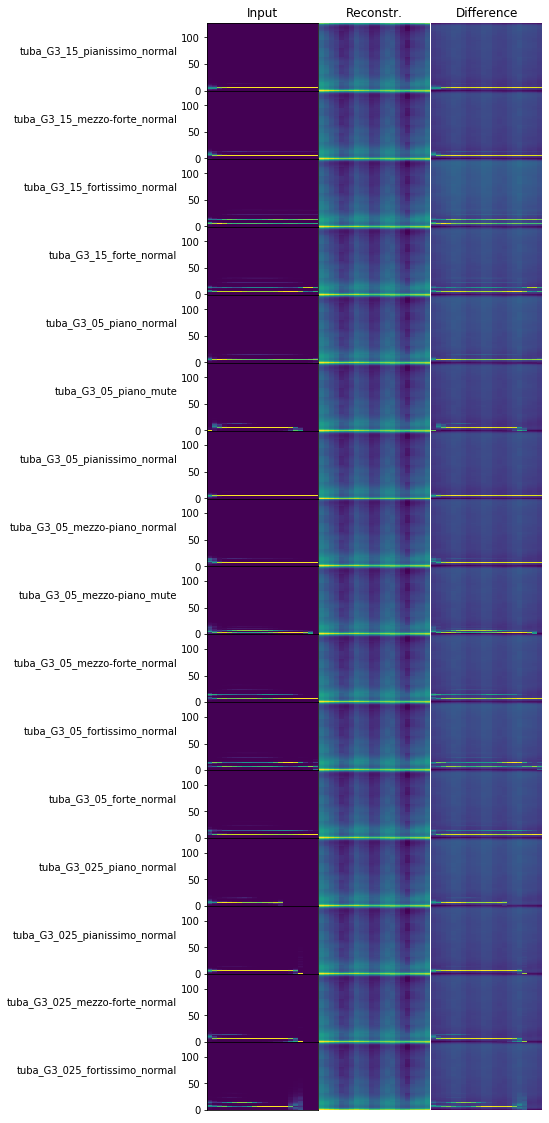

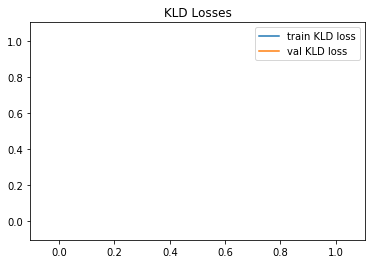

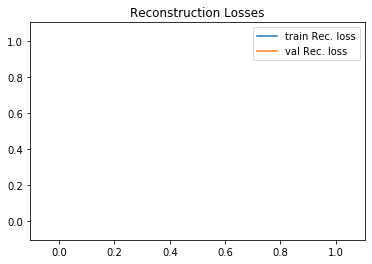

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 1


100%|██████████| 727/727 [00:09<00:00, 72.94it/s]

training_avg_loss=3244.84
 training_avg_kld=28.33
 training_avg_rec=3103.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4940.97

Epoch: 2


100%|██████████| 727/727 [00:10<00:00, 72.16it/s]

training_avg_loss=3072.11
 training_avg_kld=38.72
 training_avg_rec=2878.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=4146.08

Epoch: 3


100%|██████████| 727/727 [00:10<00:00, 71.98it/s]

training_avg_loss=3004.87
 training_avg_kld=43.35
 training_avg_rec=2788.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3694.50

Epoch: 4


100%|██████████| 727/727 [00:10<00:00, 71.84it/s]

training_avg_loss=2963.04
 training_avg_kld=48.59
 training_avg_rec=2720.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3655.27

Epoch: 5


100%|██████████| 727/727 [00:10<00:00, 71.85it/s]

training_avg_loss=2930.47
 training_avg_kld=53.51
 training_avg_rec=2662.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3386.72

Epoch: 6


100%|██████████| 727/727 [00:10<00:00, 72.22it/s]

training_avg_loss=2906.27
 training_avg_kld=58.46
 training_avg_rec=2613.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3272.69

Epoch: 7


100%|██████████| 727/727 [00:10<00:00, 71.83it/s]

training_avg_loss=2879.23
 training_avg_kld=62.23
 training_avg_rec=2568.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3117.82

Epoch: 8


100%|██████████| 727/727 [00:10<00:00, 72.15it/s]

training_avg_loss=2860.61
 training_avg_kld=64.80
 training_avg_rec=2536.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3159.15

Epoch: 9


100%|██████████| 727/727 [00:10<00:00, 72.07it/s]

training_avg_loss=2847.04
 training_avg_kld=67.22
 training_avg_rec=2510.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3075.33

Epoch: 10


100%|██████████| 727/727 [00:10<00:00, 72.06it/s]


training_avg_loss=2831.48
 training_avg_kld=69.65
 training_avg_rec=2483.20

val_avg_loss=3014.71



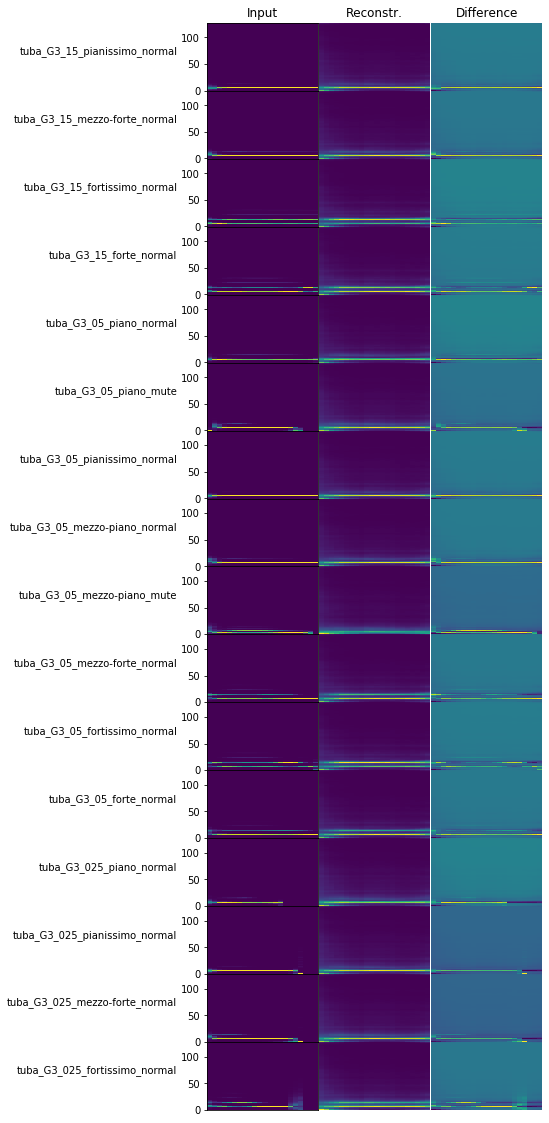

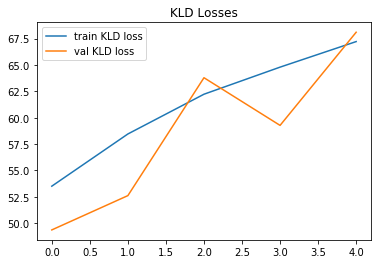

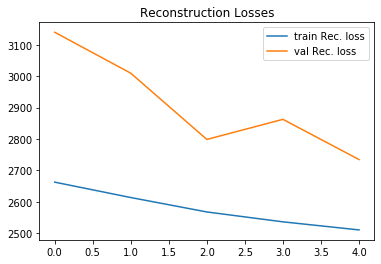

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 11


100%|██████████| 727/727 [00:09<00:00, 72.87it/s]


training_avg_loss=2822.39
 training_avg_kld=71.11
 training_avg_rec=2466.83



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3055.82

Epoch: 12


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]

training_avg_loss=2807.40
 training_avg_kld=72.26
 training_avg_rec=2446.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2945.38

Epoch: 13


100%|██████████| 727/727 [00:10<00:00, 71.87it/s]

training_avg_loss=2797.57
 training_avg_kld=73.60
 training_avg_rec=2429.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3032.20

Epoch: 14


100%|██████████| 727/727 [00:10<00:00, 71.89it/s]

training_avg_loss=2789.57
 training_avg_kld=74.24
 training_avg_rec=2418.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=3002.37

Epoch: 15


100%|██████████| 727/727 [00:10<00:00, 71.81it/s]

training_avg_loss=2775.52
 training_avg_kld=74.44
 training_avg_rec=2403.30




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2975.44

Epoch: 16


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]

training_avg_loss=2770.07
 training_avg_kld=75.03
 training_avg_rec=2394.92




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2954.12

Epoch: 17


100%|██████████| 727/727 [00:10<00:00, 71.41it/s]


training_avg_loss=2762.39
 training_avg_kld=75.66
 training_avg_rec=2384.07



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2890.87

Epoch: 18


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]

training_avg_loss=2753.68
 training_avg_kld=75.99
 training_avg_rec=2373.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2969.41

Epoch: 19


100%|██████████| 727/727 [00:10<00:00, 72.03it/s]

training_avg_loss=2746.46
 training_avg_kld=76.13
 training_avg_rec=2365.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2891.23

Epoch: 20


100%|██████████| 727/727 [00:10<00:00, 71.43it/s]

training_avg_loss=2744.14
 training_avg_kld=76.86
 training_avg_rec=2359.86



val_avg_loss=2916.29



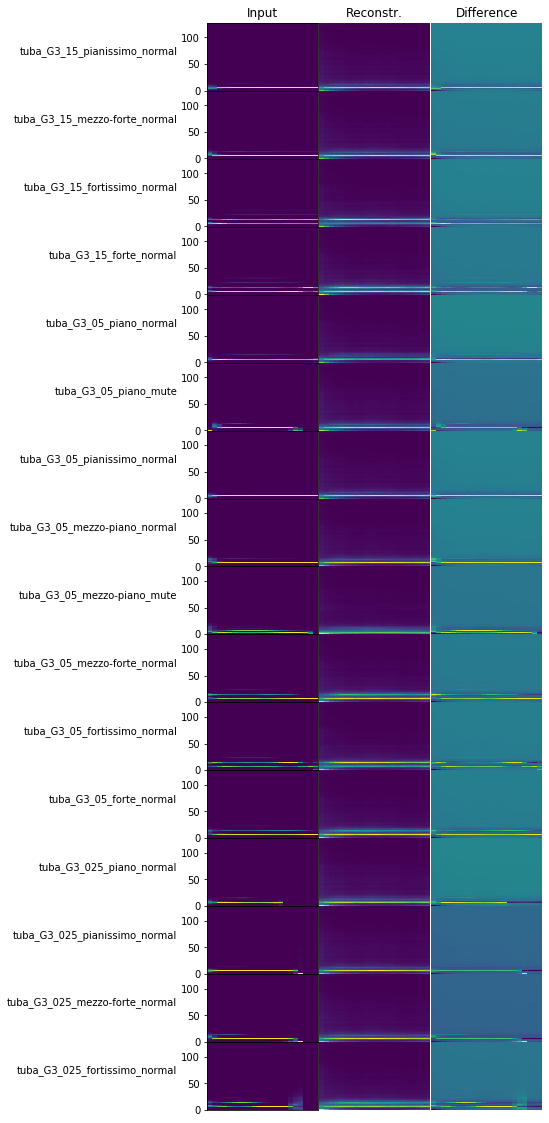

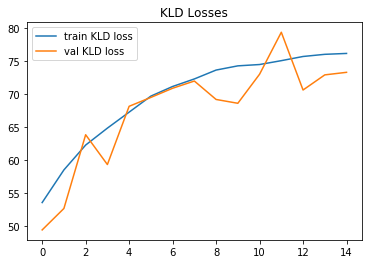

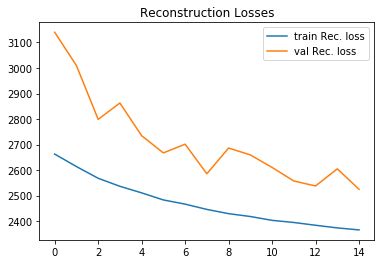

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 21


100%|██████████| 727/727 [00:10<00:00, 75.89it/s]

training_avg_loss=2738.29
 training_avg_kld=77.16
 training_avg_rec=2352.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2889.13

Epoch: 22


100%|██████████| 727/727 [00:10<00:00, 72.03it/s]


training_avg_loss=2740.16
 training_avg_kld=78.23
 training_avg_rec=2349.00



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2875.97

Epoch: 23


100%|██████████| 727/727 [00:10<00:00, 71.73it/s]

training_avg_loss=2728.51
 training_avg_kld=77.18
 training_avg_rec=2342.62




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2871.24

Epoch: 24


100%|██████████| 727/727 [00:10<00:00, 71.60it/s]

training_avg_loss=2724.13
 training_avg_kld=77.96
 training_avg_rec=2334.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2873.07

Epoch: 25


100%|██████████| 727/727 [00:10<00:00, 72.18it/s]

training_avg_loss=2721.81
 training_avg_kld=78.27
 training_avg_rec=2330.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2913.43

Epoch: 26


100%|██████████| 727/727 [00:10<00:00, 71.60it/s]


training_avg_loss=2715.77
 training_avg_kld=78.34
 training_avg_rec=2324.06



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2881.37

Epoch: 27


100%|██████████| 727/727 [00:10<00:00, 71.64it/s]


training_avg_loss=2709.77
 training_avg_kld=78.96
 training_avg_rec=2314.96



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2873.78

Epoch: 28


100%|██████████| 727/727 [00:10<00:00, 72.44it/s]


training_avg_loss=2709.38
 training_avg_kld=79.47
 training_avg_rec=2312.05



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2931.11

Epoch: 29


100%|██████████| 727/727 [00:10<00:00, 71.74it/s]

training_avg_loss=2707.51
 training_avg_kld=80.01
 training_avg_rec=2307.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2930.19

Epoch: 30


100%|██████████| 727/727 [00:10<00:00, 72.01it/s]

training_avg_loss=2699.56
 training_avg_kld=80.06
 training_avg_rec=2299.25



val_avg_loss=2820.00



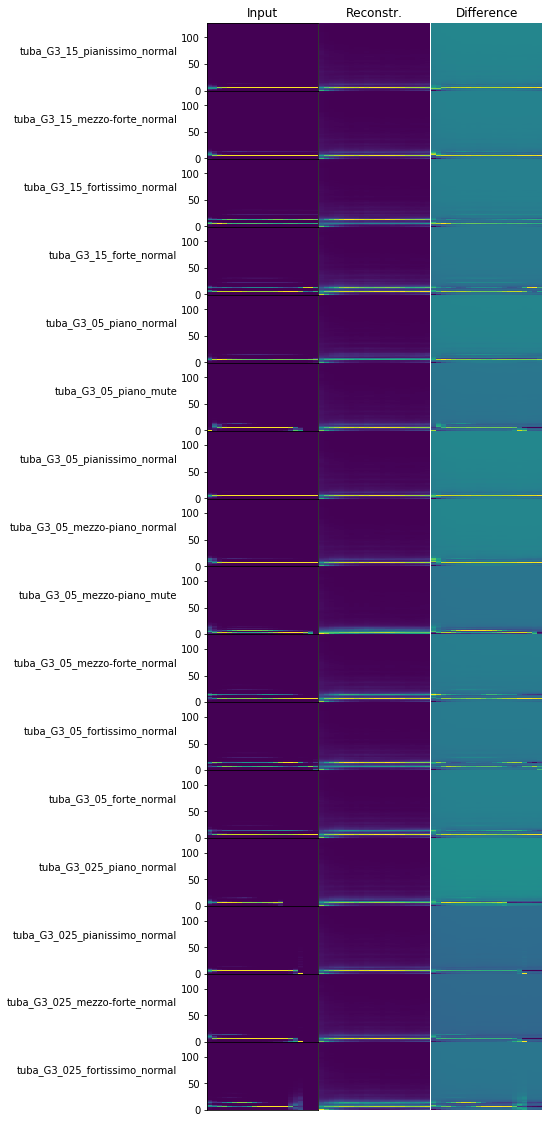

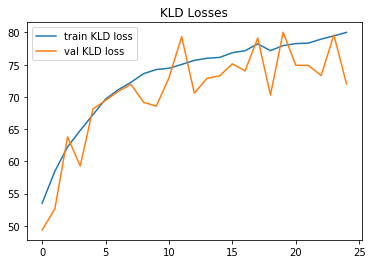

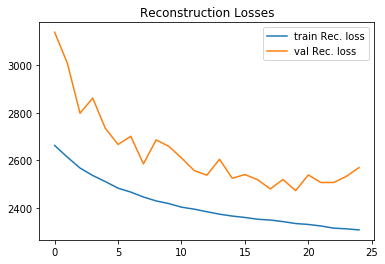

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 31


100%|██████████| 727/727 [00:09<00:00, 72.84it/s]

training_avg_loss=2693.71
 training_avg_kld=79.95
 training_avg_rec=2293.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2847.37

Epoch: 32


100%|██████████| 727/727 [00:10<00:00, 71.78it/s]

training_avg_loss=2691.86
 training_avg_kld=79.97
 training_avg_rec=2291.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2840.47

Epoch: 33


100%|██████████| 727/727 [00:10<00:00, 72.33it/s]

training_avg_loss=2688.39
 training_avg_kld=79.84
 training_avg_rec=2289.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2813.07

Epoch: 34


100%|██████████| 727/727 [00:10<00:00, 72.07it/s]

training_avg_loss=2688.01
 training_avg_kld=80.91
 training_avg_rec=2283.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2915.84

Epoch: 35


100%|██████████| 727/727 [00:10<00:00, 72.00it/s]


training_avg_loss=2681.60
 training_avg_kld=80.85
 training_avg_rec=2277.37



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2828.30

Epoch: 36


100%|██████████| 727/727 [00:10<00:00, 71.78it/s]

training_avg_loss=2677.27
 training_avg_kld=81.26
 training_avg_rec=2270.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2952.35

Epoch: 37


100%|██████████| 727/727 [00:10<00:00, 71.87it/s]

training_avg_loss=2677.99
 training_avg_kld=81.96
 training_avg_rec=2268.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2812.83

Epoch: 38


100%|██████████| 727/727 [00:10<00:00, 71.97it/s]

training_avg_loss=2667.79
 training_avg_kld=81.51
 training_avg_rec=2260.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2796.61

Epoch: 39


100%|██████████| 727/727 [00:10<00:00, 71.91it/s]

training_avg_loss=2671.59
 training_avg_kld=82.60
 training_avg_rec=2258.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2859.19

Epoch: 40


100%|██████████| 727/727 [00:10<00:00, 71.92it/s]

training_avg_loss=2666.47
 training_avg_kld=82.22
 training_avg_rec=2255.39



val_avg_loss=2823.56



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

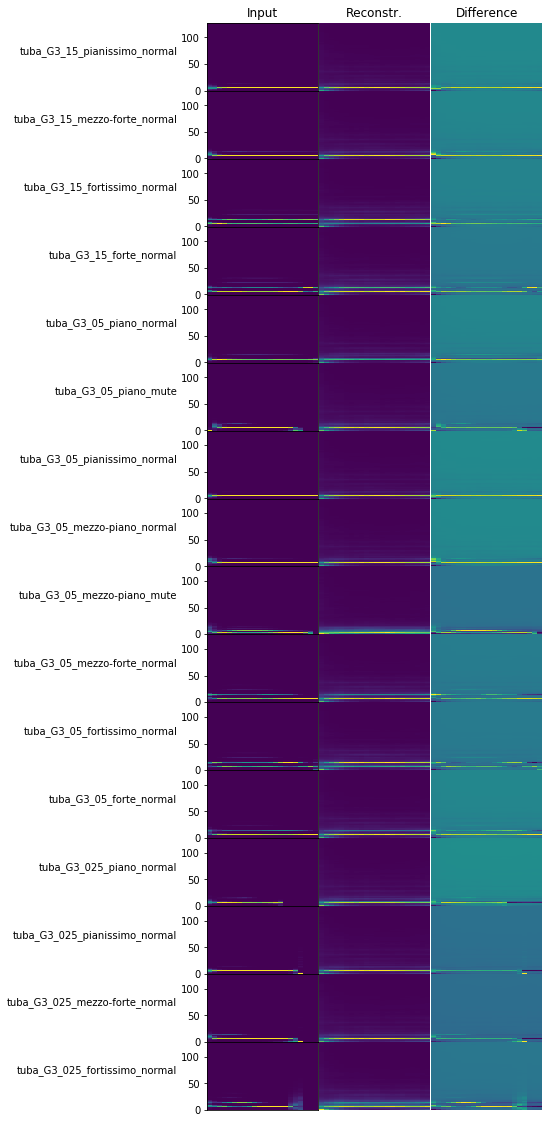

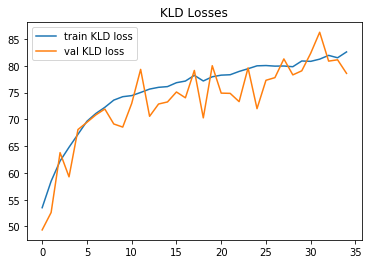

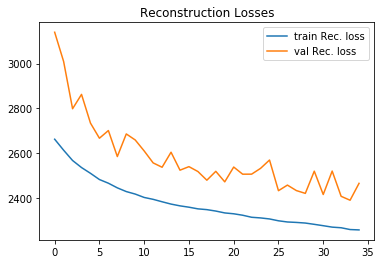

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 41


100%|██████████| 727/727 [00:09<00:00, 73.00it/s]


training_avg_loss=2662.60
 training_avg_kld=82.04
 training_avg_rec=2252.42



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2845.90

Epoch: 42


100%|██████████| 727/727 [00:10<00:00, 72.01it/s]

training_avg_loss=2657.92
 training_avg_kld=82.28
 training_avg_rec=2246.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2808.72

Epoch: 43


100%|██████████| 727/727 [00:10<00:00, 71.70it/s]

training_avg_loss=2663.65
 training_avg_kld=83.01
 training_avg_rec=2248.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2814.63

Epoch: 44


100%|██████████| 727/727 [00:10<00:00, 71.86it/s]

training_avg_loss=2651.95
 training_avg_kld=82.29
 training_avg_rec=2240.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2816.64

Epoch: 45


100%|██████████| 727/727 [00:10<00:00, 71.79it/s]


training_avg_loss=2650.98
 training_avg_kld=82.70
 training_avg_rec=2237.50



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2726.61

Epoch: 46


100%|██████████| 727/727 [00:10<00:00, 71.89it/s]

training_avg_loss=2647.43
 training_avg_kld=82.78
 training_avg_rec=2233.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2802.34

Epoch: 47


100%|██████████| 727/727 [00:10<00:00, 71.99it/s]

training_avg_loss=2643.81
 training_avg_kld=83.27
 training_avg_rec=2227.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2743.93

Epoch: 48


100%|██████████| 727/727 [00:10<00:00, 71.45it/s]

training_avg_loss=2639.46
 training_avg_kld=83.09
 training_avg_rec=2224.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2717.93

Epoch: 49


100%|██████████| 727/727 [00:10<00:00, 71.63it/s]

training_avg_loss=2640.95
 training_avg_kld=83.37
 training_avg_rec=2224.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2707.13

Epoch: 50


100%|██████████| 727/727 [00:10<00:00, 72.10it/s]

training_avg_loss=2634.87
 training_avg_kld=83.10
 training_avg_rec=2219.39



val_avg_loss=2759.76



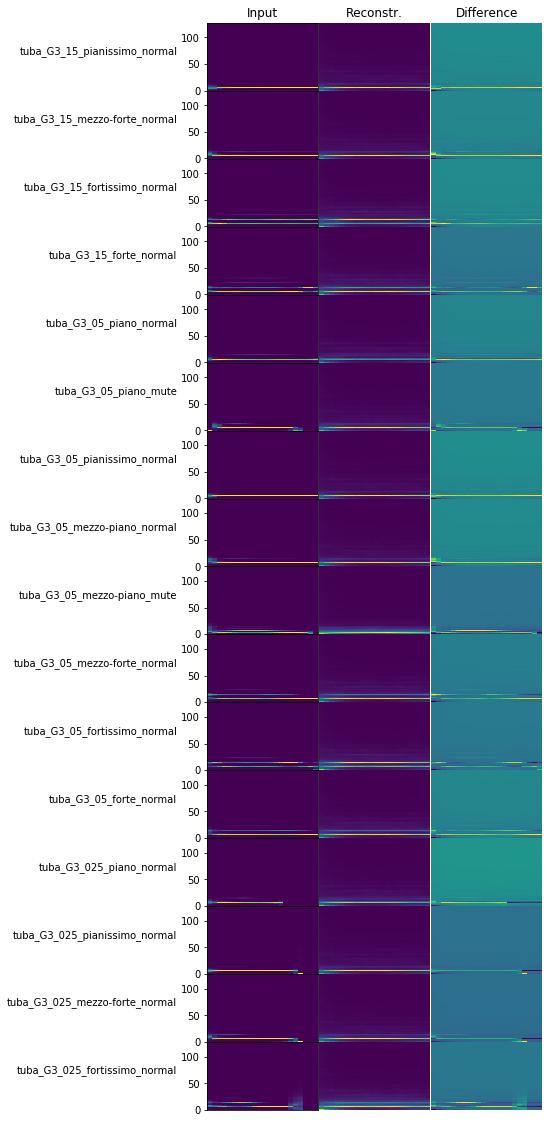

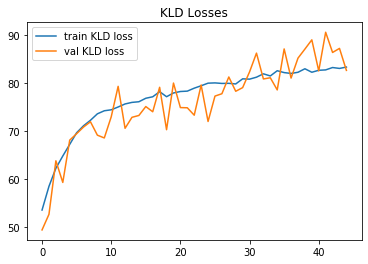

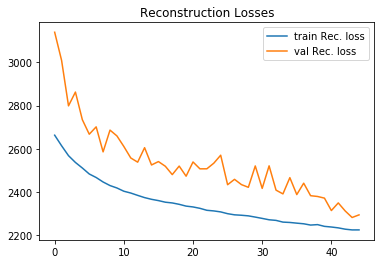

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 51


100%|██████████| 727/727 [00:09<00:00, 72.77it/s]

training_avg_loss=2637.58
 training_avg_kld=84.15
 training_avg_rec=2216.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2769.59

Epoch: 52


100%|██████████| 727/727 [00:10<00:00, 71.96it/s]

training_avg_loss=2634.43
 training_avg_kld=83.84
 training_avg_rec=2215.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2783.21

Epoch: 53


100%|██████████| 727/727 [00:10<00:00, 72.02it/s]

training_avg_loss=2630.19
 training_avg_kld=83.92
 training_avg_rec=2210.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2733.07

Epoch: 54


100%|██████████| 727/727 [00:10<00:00, 71.92it/s]

training_avg_loss=2625.03
 training_avg_kld=84.20
 training_avg_rec=2204.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2719.44

Epoch: 55


100%|██████████| 727/727 [00:10<00:00, 71.53it/s]


training_avg_loss=2624.33
 training_avg_kld=84.19
 training_avg_rec=2203.36



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2735.69

Epoch: 56


100%|██████████| 727/727 [00:10<00:00, 71.91it/s]

training_avg_loss=2618.78
 training_avg_kld=83.71
 training_avg_rec=2200.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2748.06

Epoch: 57


100%|██████████| 727/727 [00:10<00:00, 71.97it/s]

training_avg_loss=2618.76
 training_avg_kld=84.44
 training_avg_rec=2196.54




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2638.74

Epoch: 58


100%|██████████| 727/727 [00:10<00:00, 71.67it/s]

training_avg_loss=2617.09
 training_avg_kld=84.36
 training_avg_rec=2195.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2700.33

Epoch: 59


100%|██████████| 727/727 [00:10<00:00, 71.95it/s]

training_avg_loss=2615.03
 training_avg_kld=84.62
 training_avg_rec=2191.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2772.09

Epoch: 60


100%|██████████| 727/727 [00:10<00:00, 71.58it/s]

training_avg_loss=2615.45
 training_avg_kld=84.86
 training_avg_rec=2191.13



val_avg_loss=2779.43



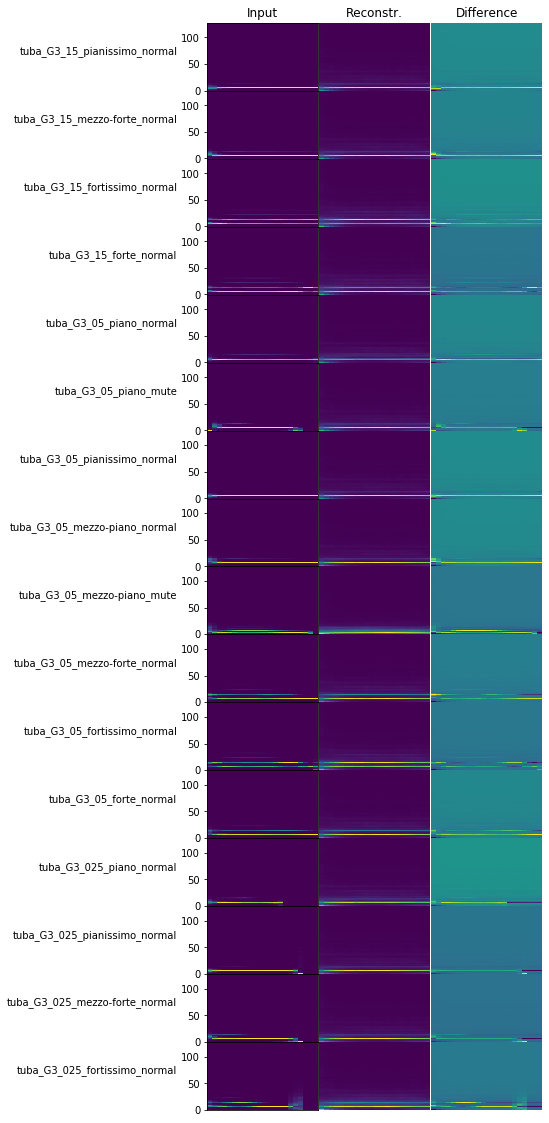

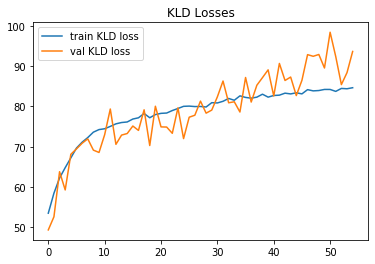

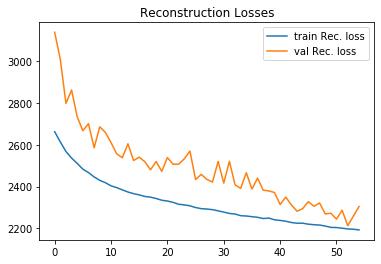

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 61


100%|██████████| 727/727 [00:10<00:00, 72.38it/s]

training_avg_loss=2612.57
 training_avg_kld=84.95
 training_avg_rec=2187.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2668.84

Epoch: 62


100%|██████████| 727/727 [00:10<00:00, 72.49it/s]

training_avg_loss=2610.32
 training_avg_kld=84.54
 training_avg_rec=2187.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2702.57

Epoch: 63


100%|██████████| 727/727 [00:10<00:00, 72.16it/s]

training_avg_loss=2608.38
 training_avg_kld=84.75
 training_avg_rec=2184.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2635.93

Epoch: 64


100%|██████████| 727/727 [00:10<00:00, 72.17it/s]

training_avg_loss=2606.15
 training_avg_kld=85.21
 training_avg_rec=2180.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2663.46

Epoch: 65


100%|██████████| 727/727 [00:10<00:00, 71.84it/s]

training_avg_loss=2606.26
 training_avg_kld=85.64
 training_avg_rec=2178.08




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2684.69

Epoch: 66


100%|██████████| 727/727 [00:10<00:00, 72.30it/s]

training_avg_loss=2602.12
 training_avg_kld=85.20
 training_avg_rec=2176.10




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2644.39

Epoch: 67


100%|██████████| 727/727 [00:10<00:00, 72.34it/s]

training_avg_loss=2602.25
 training_avg_kld=85.24
 training_avg_rec=2176.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2723.28

Epoch: 68


100%|██████████| 727/727 [00:10<00:00, 72.00it/s]


training_avg_loss=2594.35
 training_avg_kld=85.17
 training_avg_rec=2168.51



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2726.69

Epoch: 69


100%|██████████| 727/727 [00:10<00:00, 72.04it/s]


training_avg_loss=2596.44
 training_avg_kld=85.66
 training_avg_rec=2168.13



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2704.96

Epoch: 70


100%|██████████| 727/727 [00:10<00:00, 72.40it/s]

training_avg_loss=2593.57
 training_avg_kld=85.59
 training_avg_rec=2165.63



val_avg_loss=2692.61



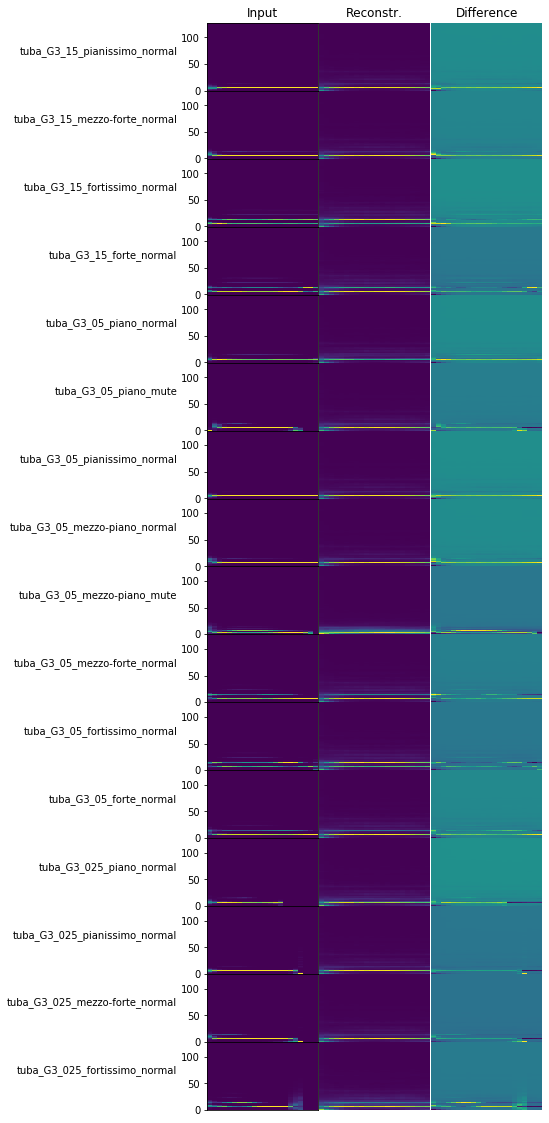

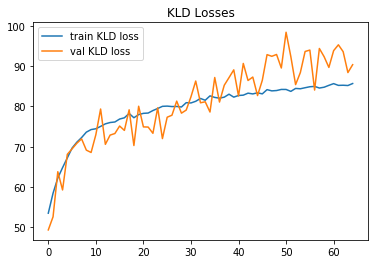

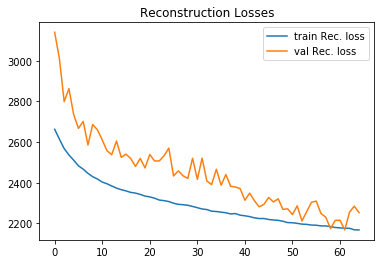

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 71


100%|██████████| 727/727 [00:09<00:00, 72.85it/s]

training_avg_loss=2592.92
 training_avg_kld=85.87
 training_avg_rec=2163.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2646.21

Epoch: 72


100%|██████████| 727/727 [00:10<00:00, 71.92it/s]

training_avg_loss=2588.34
 training_avg_kld=85.29
 training_avg_rec=2161.88




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2673.66

Epoch: 73


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]

training_avg_loss=2591.40
 training_avg_kld=86.03
 training_avg_rec=2161.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2683.40

Epoch: 74


100%|██████████| 727/727 [00:10<00:00, 72.05it/s]

training_avg_loss=2591.18
 training_avg_kld=86.72
 training_avg_rec=2157.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2614.93

Epoch: 75


100%|██████████| 727/727 [00:10<00:00, 71.86it/s]

training_avg_loss=2584.83
 training_avg_kld=86.03
 training_avg_rec=2154.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2647.34

Epoch: 76


100%|██████████| 727/727 [00:10<00:00, 71.79it/s]

training_avg_loss=2585.28
 training_avg_kld=86.25
 training_avg_rec=2154.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2625.82

Epoch: 77


100%|██████████| 727/727 [00:10<00:00, 71.91it/s]


training_avg_loss=2585.53
 training_avg_kld=86.52
 training_avg_rec=2152.93



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2674.48

Epoch: 78


100%|██████████| 727/727 [00:10<00:00, 72.07it/s]


training_avg_loss=2580.67
 training_avg_kld=86.19
 training_avg_rec=2149.72



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2688.08

Epoch: 79


100%|██████████| 727/727 [00:10<00:00, 71.73it/s]

training_avg_loss=2583.06
 training_avg_kld=86.91
 training_avg_rec=2148.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2657.94

Epoch: 80


100%|██████████| 727/727 [00:10<00:00, 72.03it/s]

training_avg_loss=2577.97
 training_avg_kld=86.19
 training_avg_rec=2147.02



val_avg_loss=2686.57



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

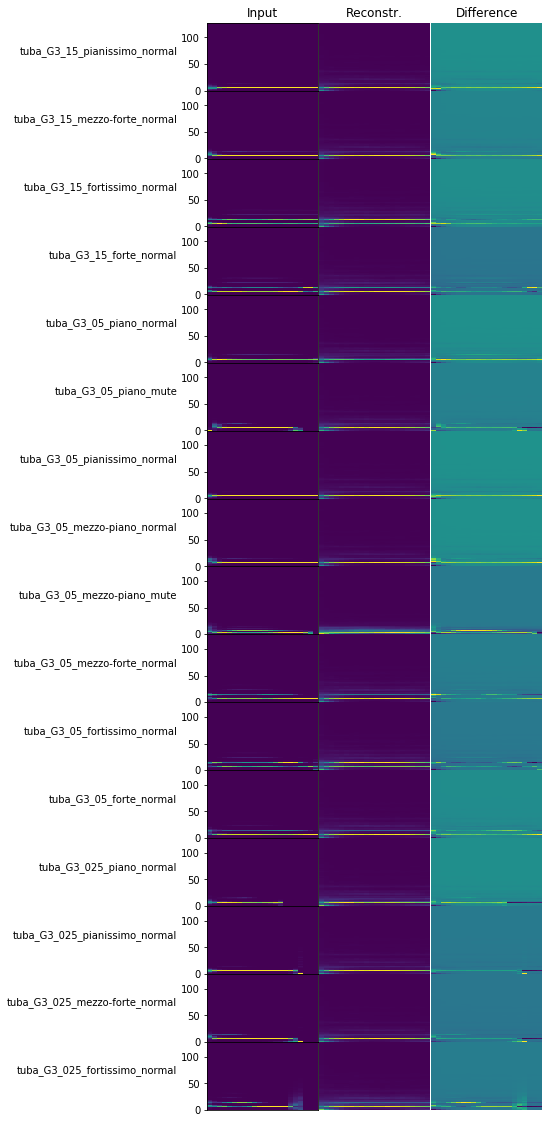

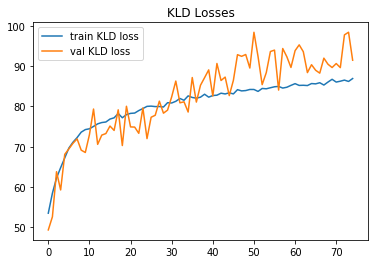

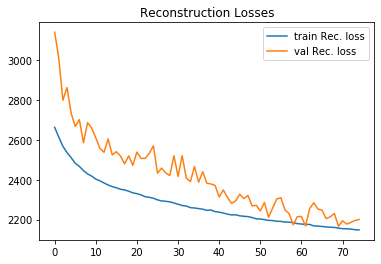

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 81


100%|██████████| 727/727 [00:09<00:00, 72.82it/s]

training_avg_loss=2578.25
 training_avg_kld=86.87
 training_avg_rec=2143.90




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2612.94

Epoch: 82


100%|██████████| 727/727 [00:10<00:00, 71.92it/s]

training_avg_loss=2571.99
 training_avg_kld=86.32
 training_avg_rec=2140.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2651.68

Epoch: 83


100%|██████████| 727/727 [00:10<00:00, 71.65it/s]

training_avg_loss=2574.08
 training_avg_kld=86.70
 training_avg_rec=2140.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2660.33

Epoch: 84


100%|██████████| 727/727 [00:10<00:00, 72.26it/s]


training_avg_loss=2570.88
 training_avg_kld=86.40
 training_avg_rec=2138.90



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2651.58

Epoch: 85


100%|██████████| 727/727 [00:10<00:00, 71.81it/s]

training_avg_loss=2572.25
 training_avg_kld=86.84
 training_avg_rec=2138.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2647.53

Epoch: 86


100%|██████████| 727/727 [00:10<00:00, 71.67it/s]

training_avg_loss=2573.50
 training_avg_kld=86.93
 training_avg_rec=2138.87




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2630.79

Epoch: 87


100%|██████████| 727/727 [00:10<00:00, 71.87it/s]


training_avg_loss=2568.92
 training_avg_kld=86.76
 training_avg_rec=2135.12



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2655.18

Epoch: 88


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2568.39
 training_avg_kld=87.52
 training_avg_rec=2130.79




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2625.49

Epoch: 89


100%|██████████| 727/727 [00:10<00:00, 71.94it/s]

training_avg_loss=2565.76
 training_avg_kld=87.00
 training_avg_rec=2130.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2605.91

Epoch: 90


100%|██████████| 727/727 [00:10<00:00, 71.78it/s]

training_avg_loss=2566.31
 training_avg_kld=87.10
 training_avg_rec=2130.79



val_avg_loss=2607.28



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

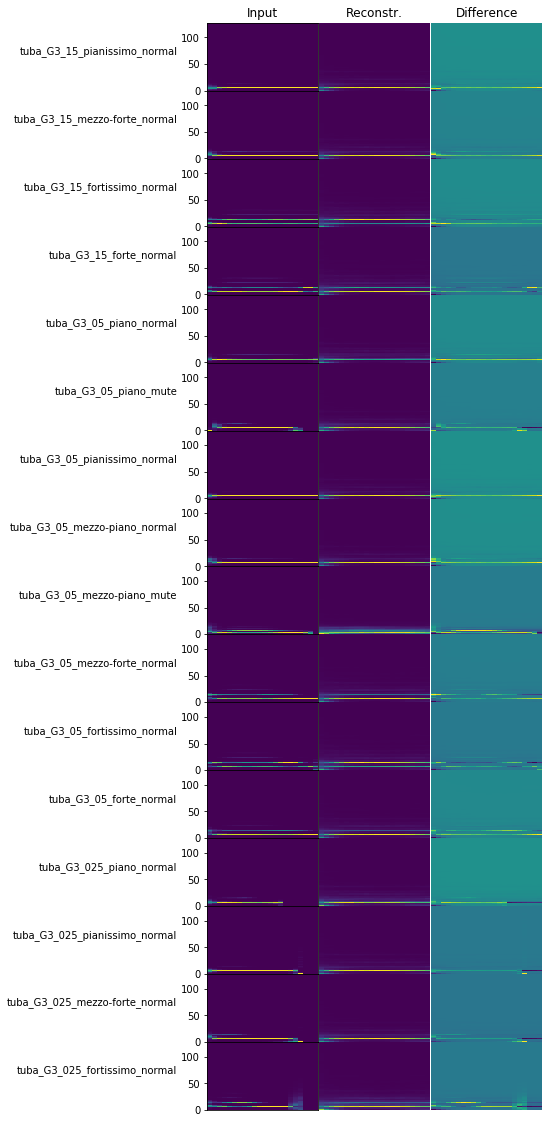

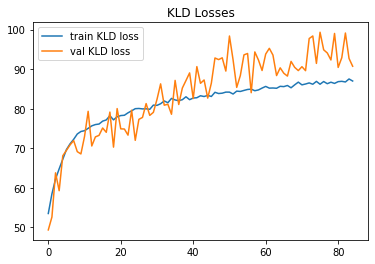

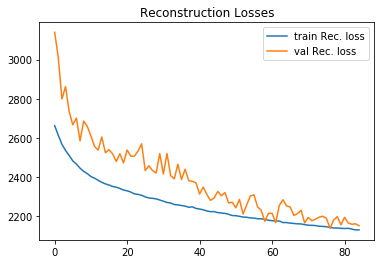

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 91


100%|██████████| 727/727 [00:09<00:00, 72.93it/s]

training_avg_loss=2564.66
 training_avg_kld=87.03
 training_avg_rec=2129.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2603.30

Epoch: 92


100%|██████████| 727/727 [00:10<00:00, 71.90it/s]

training_avg_loss=2558.82
 training_avg_kld=86.89
 training_avg_rec=2124.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2675.09

Epoch: 93


100%|██████████| 727/727 [00:10<00:00, 72.09it/s]


training_avg_loss=2564.48
 training_avg_kld=87.77
 training_avg_rec=2125.65



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2615.36

Epoch: 94


100%|██████████| 727/727 [00:10<00:00, 71.66it/s]

training_avg_loss=2560.15
 training_avg_kld=87.33
 training_avg_rec=2123.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2636.18

Epoch: 95


100%|██████████| 727/727 [00:10<00:00, 71.87it/s]

training_avg_loss=2555.89
 training_avg_kld=86.84
 training_avg_rec=2121.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2581.71

Epoch: 96


100%|██████████| 727/727 [00:10<00:00, 72.12it/s]

training_avg_loss=2558.36
 training_avg_kld=87.48
 training_avg_rec=2120.95




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2610.36

Epoch: 97


100%|██████████| 727/727 [00:10<00:00, 71.78it/s]

training_avg_loss=2559.97
 training_avg_kld=87.81
 training_avg_rec=2120.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2637.59

Epoch: 98


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]

training_avg_loss=2554.33
 training_avg_kld=87.02
 training_avg_rec=2119.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2652.10

Epoch: 99


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2551.66
 training_avg_kld=87.15
 training_avg_rec=2115.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2623.77

Epoch: 100


100%|██████████| 727/727 [00:10<00:00, 71.91it/s]

training_avg_loss=2552.56
 training_avg_kld=87.68
 training_avg_rec=2114.18



val_avg_loss=2619.99



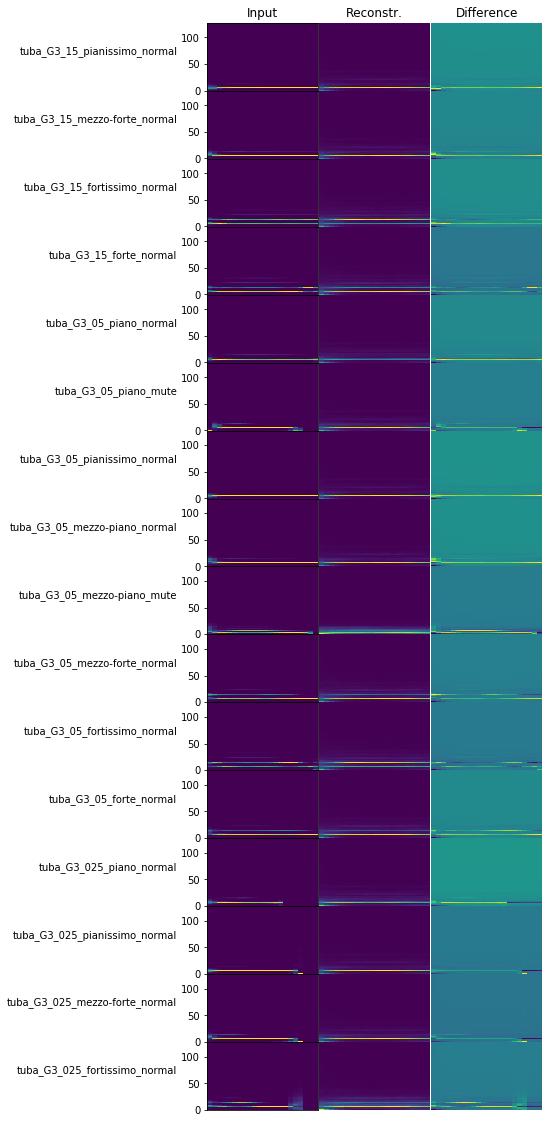

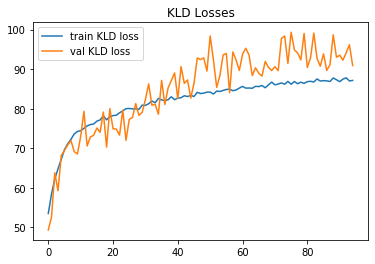

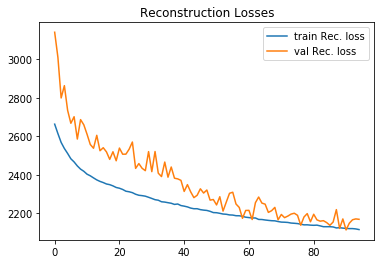

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 101


100%|██████████| 727/727 [00:09<00:00, 72.86it/s]

training_avg_loss=2557.30
 training_avg_kld=88.25
 training_avg_rec=2116.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2609.86

Epoch: 102


100%|██████████| 727/727 [00:10<00:00, 71.66it/s]

training_avg_loss=2552.57
 training_avg_kld=87.62
 training_avg_rec=2114.46




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2620.61

Epoch: 103


100%|██████████| 727/727 [00:10<00:00, 71.65it/s]

training_avg_loss=2550.09
 training_avg_kld=87.82
 training_avg_rec=2110.97




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2615.15

Epoch: 104


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]


training_avg_loss=2551.67
 training_avg_kld=88.60
 training_avg_rec=2108.69



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2623.53

Epoch: 105


100%|██████████| 727/727 [00:10<00:00, 72.00it/s]

training_avg_loss=2553.78
 training_avg_kld=88.70
 training_avg_rec=2110.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2681.35

Epoch: 106


100%|██████████| 727/727 [00:10<00:00, 71.63it/s]

training_avg_loss=2552.31
 training_avg_kld=88.60
 training_avg_rec=2109.32




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2650.73

Epoch: 107


100%|██████████| 727/727 [00:10<00:00, 71.83it/s]

training_avg_loss=2545.89
 training_avg_kld=87.62
 training_avg_rec=2107.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2621.43

Epoch: 108


100%|██████████| 727/727 [00:10<00:00, 71.75it/s]

training_avg_loss=2546.64
 training_avg_kld=88.28
 training_avg_rec=2105.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2649.40

Epoch: 109


100%|██████████| 727/727 [00:10<00:00, 72.14it/s]

training_avg_loss=2547.86
 training_avg_kld=88.71
 training_avg_rec=2104.33




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2598.51

Epoch: 110


100%|██████████| 727/727 [00:10<00:00, 71.59it/s]

training_avg_loss=2541.38
 training_avg_kld=87.85
 training_avg_rec=2102.15



val_avg_loss=2597.68



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

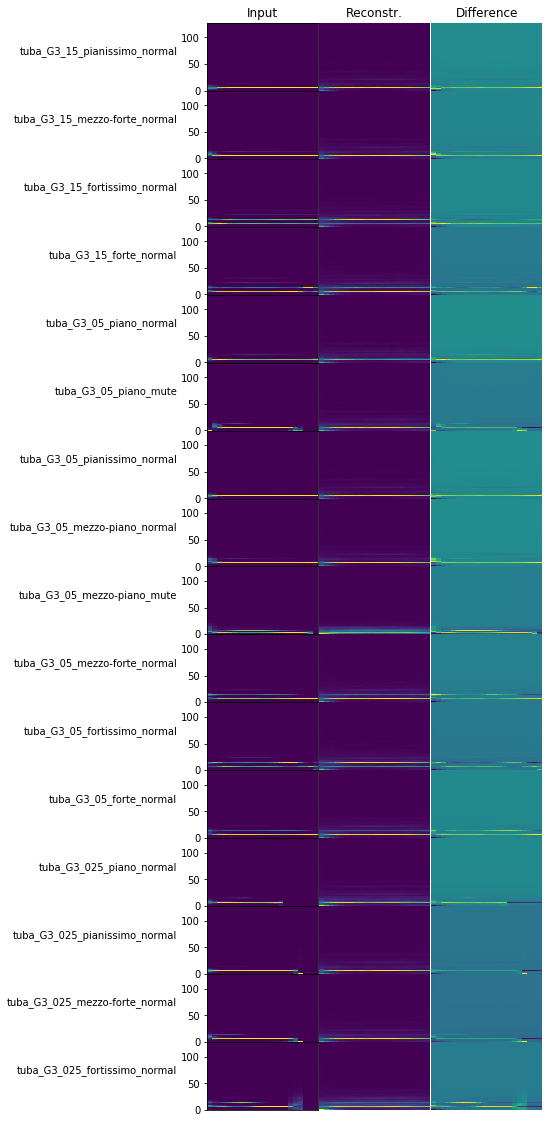

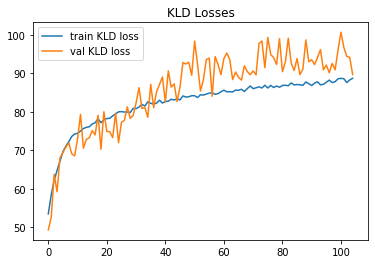

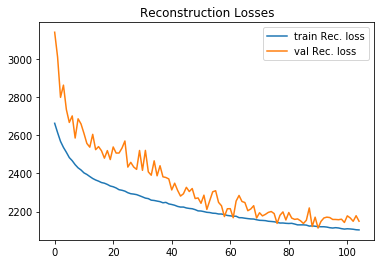

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 111


100%|██████████| 727/727 [00:09<00:00, 72.78it/s]

training_avg_loss=2543.30
 training_avg_kld=88.38
 training_avg_rec=2101.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2655.19

Epoch: 112


100%|██████████| 727/727 [00:10<00:00, 72.11it/s]

training_avg_loss=2542.61
 training_avg_kld=88.05
 training_avg_rec=2102.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2627.16

Epoch: 113


100%|██████████| 727/727 [00:10<00:00, 71.93it/s]

training_avg_loss=2543.16
 training_avg_kld=88.50
 training_avg_rec=2100.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2642.80

Epoch: 114


100%|██████████| 727/727 [00:10<00:00, 71.85it/s]

training_avg_loss=2542.92
 training_avg_kld=88.90
 training_avg_rec=2098.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2643.37

Epoch: 115


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]


training_avg_loss=2541.16
 training_avg_kld=88.71
 training_avg_rec=2097.59



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2622.53

Epoch: 116


100%|██████████| 727/727 [00:10<00:00, 71.94it/s]

training_avg_loss=2537.59
 training_avg_kld=87.95
 training_avg_rec=2097.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2636.39

Epoch: 117


100%|██████████| 727/727 [00:10<00:00, 71.73it/s]

training_avg_loss=2539.29
 training_avg_kld=88.43
 training_avg_rec=2097.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2589.43

Epoch: 118


100%|██████████| 727/727 [00:10<00:00, 72.22it/s]

training_avg_loss=2542.31
 training_avg_kld=89.31
 training_avg_rec=2095.75




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2590.97

Epoch: 119


100%|██████████| 727/727 [00:10<00:00, 71.95it/s]

training_avg_loss=2536.45
 training_avg_kld=88.72
 training_avg_rec=2092.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2637.89

Epoch: 120


100%|██████████| 727/727 [00:10<00:00, 71.67it/s]


training_avg_loss=2533.63
 training_avg_kld=88.28
 training_avg_rec=2092.21

val_avg_loss=2599.08



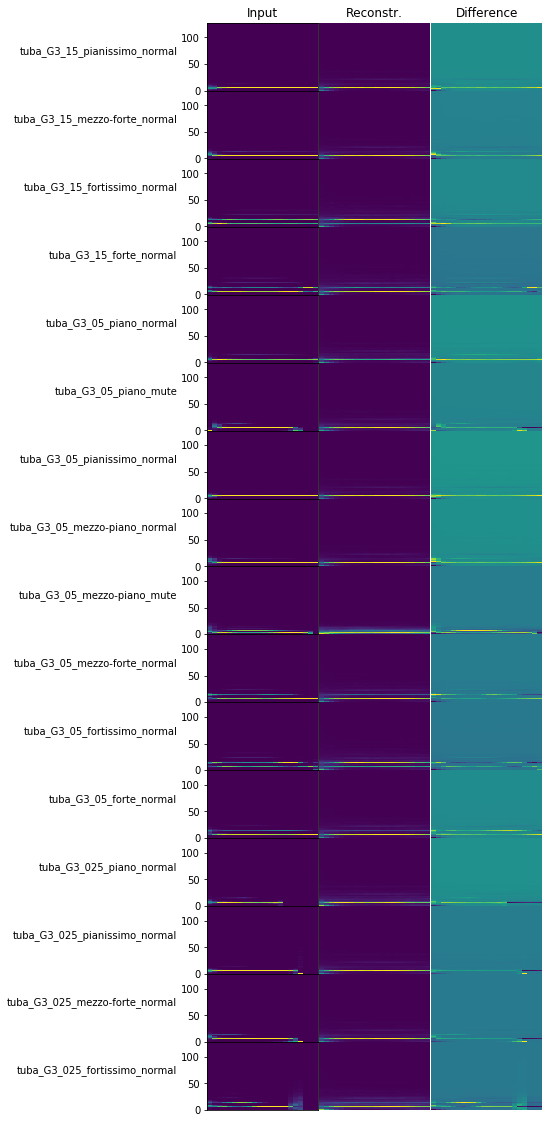

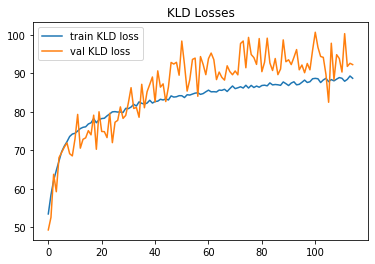

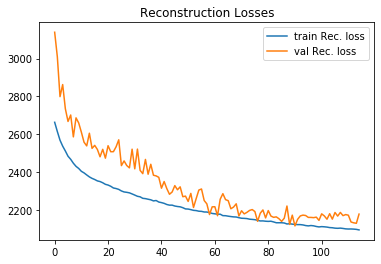

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 121


100%|██████████| 727/727 [00:09<00:00, 72.78it/s]

training_avg_loss=2534.35
 training_avg_kld=88.41
 training_avg_rec=2092.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2583.62

Epoch: 122


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]

training_avg_loss=2533.74
 training_avg_kld=88.60
 training_avg_rec=2090.72




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2653.51

Epoch: 123


100%|██████████| 727/727 [00:10<00:00, 71.75it/s]

training_avg_loss=2536.13
 training_avg_kld=89.01
 training_avg_rec=2091.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2564.56

Epoch: 124


100%|██████████| 727/727 [00:10<00:00, 71.71it/s]


training_avg_loss=2531.81
 training_avg_kld=88.77
 training_avg_rec=2087.94



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2628.31

Epoch: 125


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2530.98
 training_avg_kld=88.52
 training_avg_rec=2088.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2604.44

Epoch: 126


100%|██████████| 727/727 [00:10<00:00, 71.91it/s]


training_avg_loss=2534.13
 training_avg_kld=89.24
 training_avg_rec=2087.92



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2583.31

Epoch: 127


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]

training_avg_loss=2531.77
 training_avg_kld=88.99
 training_avg_rec=2086.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2588.95

Epoch: 128


100%|██████████| 727/727 [00:10<00:00, 71.77it/s]

training_avg_loss=2528.29
 training_avg_kld=88.54
 training_avg_rec=2085.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2592.81

Epoch: 129


100%|██████████| 727/727 [00:10<00:00, 71.73it/s]

training_avg_loss=2528.24
 training_avg_kld=88.33
 training_avg_rec=2086.61




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2591.75

Epoch: 130


100%|██████████| 727/727 [00:10<00:00, 71.41it/s]

training_avg_loss=2529.52
 training_avg_kld=89.09
 training_avg_rec=2084.08



val_avg_loss=2572.83



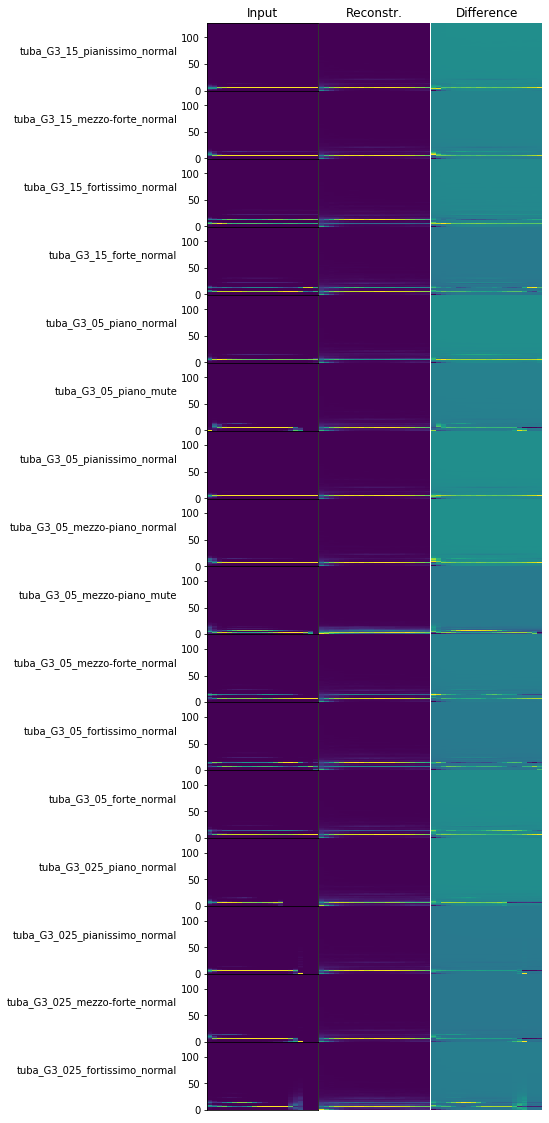

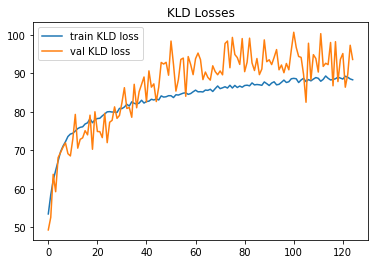

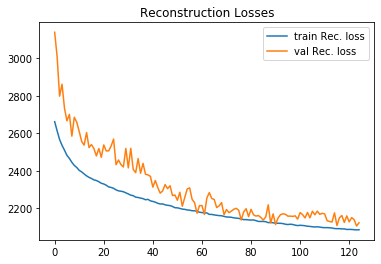

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 131


100%|██████████| 727/727 [00:10<00:00, 75.21it/s]

training_avg_loss=2526.37
 training_avg_kld=89.07
 training_avg_rec=2081.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2565.41

Epoch: 132


100%|██████████| 727/727 [00:10<00:00, 71.52it/s]

training_avg_loss=2523.46
 training_avg_kld=88.43
 training_avg_rec=2081.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2617.70

Epoch: 133


100%|██████████| 727/727 [00:10<00:00, 71.80it/s]


training_avg_loss=2527.81
 training_avg_kld=88.94
 training_avg_rec=2083.12



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2602.88

Epoch: 134


100%|██████████| 727/727 [00:10<00:00, 71.83it/s]

training_avg_loss=2523.22
 training_avg_kld=88.23
 training_avg_rec=2082.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2579.68

Epoch: 135


100%|██████████| 727/727 [00:10<00:00, 71.26it/s]

training_avg_loss=2526.50
 training_avg_kld=89.23
 training_avg_rec=2080.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2596.39

Epoch: 136


100%|██████████| 727/727 [00:10<00:00, 70.61it/s]

training_avg_loss=2522.60
 training_avg_kld=88.87
 training_avg_rec=2078.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2596.32

Epoch: 137


100%|██████████| 727/727 [00:10<00:00, 71.84it/s]

training_avg_loss=2525.43
 training_avg_kld=89.02
 training_avg_rec=2080.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2613.22

Epoch: 138


100%|██████████| 727/727 [00:10<00:00, 71.94it/s]

training_avg_loss=2523.88
 training_avg_kld=89.30
 training_avg_rec=2077.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2616.33

Epoch: 139


100%|██████████| 727/727 [00:10<00:00, 71.92it/s]

training_avg_loss=2523.64
 training_avg_kld=89.25
 training_avg_rec=2077.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2597.32

Epoch: 140


100%|██████████| 727/727 [00:10<00:00, 71.66it/s]

training_avg_loss=2522.57
 training_avg_kld=89.40
 training_avg_rec=2075.60



val_avg_loss=2570.68



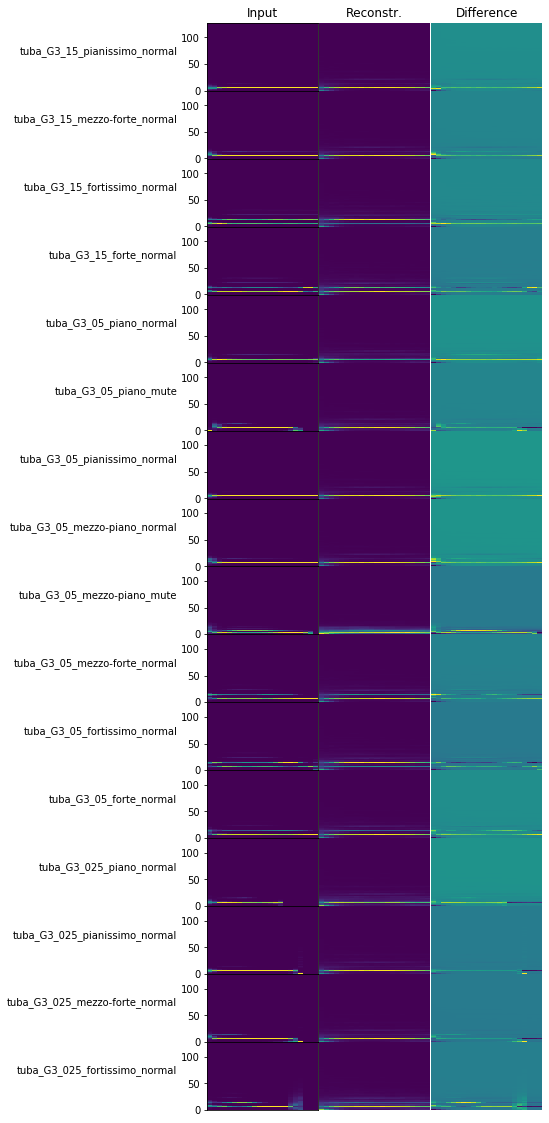

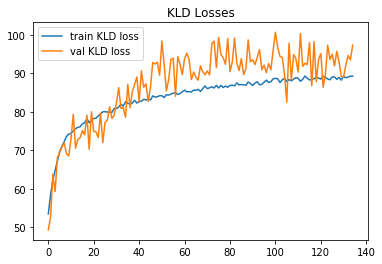

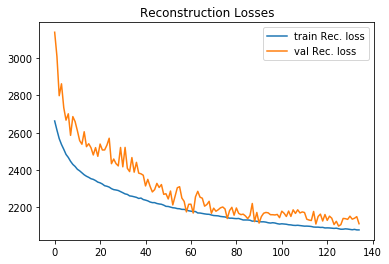

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 141


100%|██████████| 727/727 [00:10<00:00, 72.59it/s]

training_avg_loss=2525.27
 training_avg_kld=90.23
 training_avg_rec=2074.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2567.14

Epoch: 142


100%|██████████| 727/727 [00:10<00:00, 71.45it/s]

training_avg_loss=2520.66
 training_avg_kld=89.25
 training_avg_rec=2074.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2579.02

Epoch: 143


100%|██████████| 727/727 [00:10<00:00, 72.00it/s]


training_avg_loss=2519.68
 training_avg_kld=89.14
 training_avg_rec=2073.98



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2604.44

Epoch: 144


100%|██████████| 727/727 [00:10<00:00, 72.03it/s]

training_avg_loss=2520.24
 training_avg_kld=89.42
 training_avg_rec=2073.15




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2572.52

Epoch: 145


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2519.62
 training_avg_kld=89.20
 training_avg_rec=2073.63




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2615.33

Epoch: 146


100%|██████████| 727/727 [00:10<00:00, 71.81it/s]

training_avg_loss=2520.23
 training_avg_kld=89.90
 training_avg_rec=2070.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2591.66

Epoch: 147


100%|██████████| 727/727 [00:10<00:00, 71.71it/s]

training_avg_loss=2517.97
 training_avg_kld=89.25
 training_avg_rec=2071.71




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2563.04

Epoch: 148


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]

training_avg_loss=2519.64
 training_avg_kld=90.49
 training_avg_rec=2067.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2586.13

Epoch: 149


100%|██████████| 727/727 [00:10<00:00, 71.33it/s]

training_avg_loss=2513.72
 training_avg_kld=89.17
 training_avg_rec=2067.88




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2575.00

Epoch: 150


100%|██████████| 727/727 [00:10<00:00, 71.66it/s]

training_avg_loss=2518.67
 training_avg_kld=90.15
 training_avg_rec=2067.90



val_avg_loss=2560.61



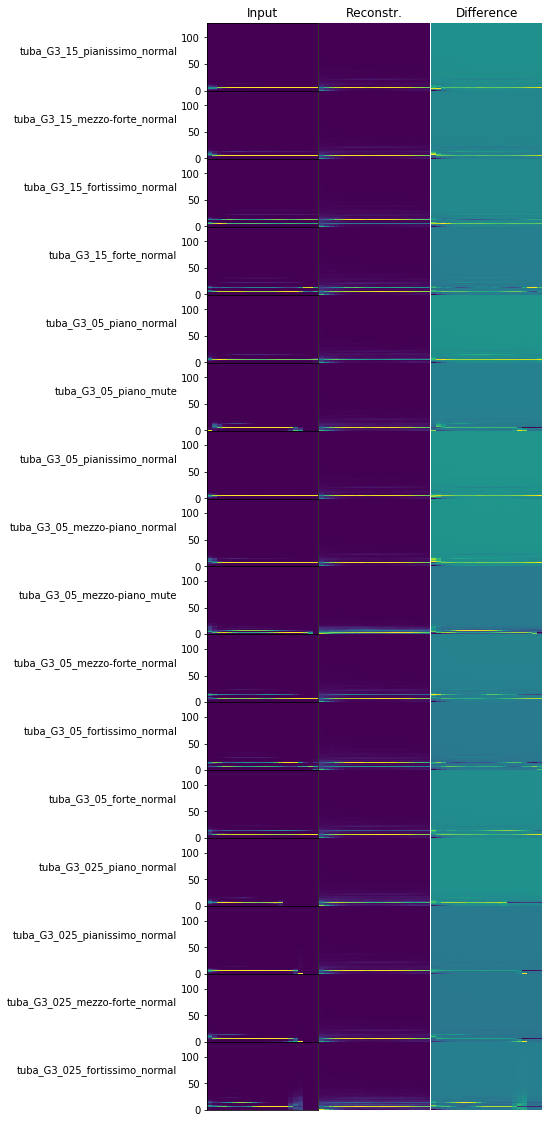

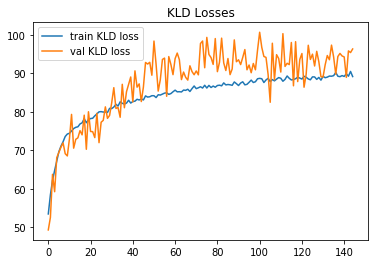

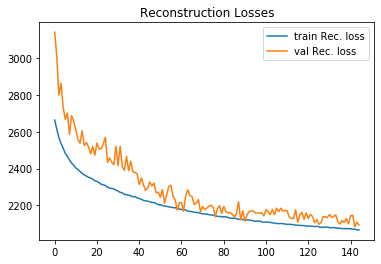

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 151


100%|██████████| 727/727 [00:10<00:00, 71.91it/s]

training_avg_loss=2516.79
 training_avg_kld=89.51
 training_avg_rec=2069.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.69

Epoch: 152


100%|██████████| 727/727 [00:10<00:00, 71.73it/s]

training_avg_loss=2516.87
 training_avg_kld=89.86
 training_avg_rec=2067.56




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2591.73

Epoch: 153


100%|██████████| 727/727 [00:10<00:00, 72.01it/s]

training_avg_loss=2514.23
 training_avg_kld=89.44
 training_avg_rec=2067.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2619.49

Epoch: 154


100%|██████████| 727/727 [00:10<00:00, 72.00it/s]

training_avg_loss=2512.36
 training_avg_kld=89.70
 training_avg_rec=2063.86




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2590.35

Epoch: 155


100%|██████████| 727/727 [00:10<00:00, 71.71it/s]

training_avg_loss=2513.08
 training_avg_kld=89.55
 training_avg_rec=2065.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2578.48

Epoch: 156


100%|██████████| 727/727 [00:10<00:00, 71.97it/s]

training_avg_loss=2512.61
 training_avg_kld=90.00
 training_avg_rec=2062.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2575.29

Epoch: 157


100%|██████████| 727/727 [00:10<00:00, 70.95it/s]

training_avg_loss=2511.69
 training_avg_kld=89.38
 training_avg_rec=2064.77




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2559.74

Epoch: 158


100%|██████████| 727/727 [00:10<00:00, 71.98it/s]

training_avg_loss=2514.28
 training_avg_kld=89.80
 training_avg_rec=2065.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2555.04

Epoch: 159


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]

training_avg_loss=2511.49
 training_avg_kld=89.98
 training_avg_rec=2061.57




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2549.30

Epoch: 160


100%|██████████| 727/727 [00:10<00:00, 71.69it/s]

training_avg_loss=2507.94
 training_avg_kld=89.04
 training_avg_rec=2062.72



val_avg_loss=2573.82



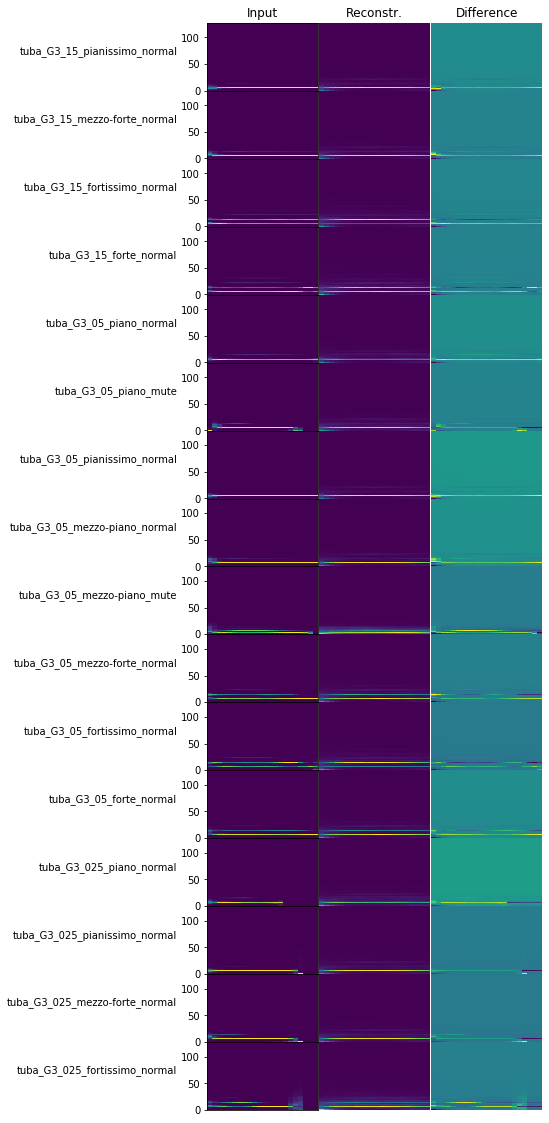

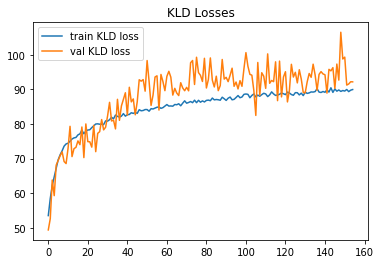

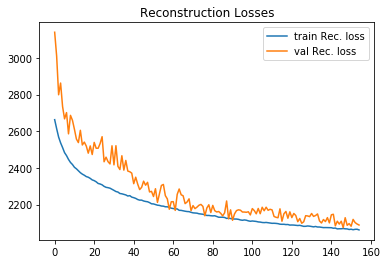

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 161


100%|██████████| 727/727 [00:09<00:00, 72.81it/s]


training_avg_loss=2509.08
 training_avg_kld=89.80
 training_avg_rec=2060.06



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2586.11

Epoch: 162


100%|██████████| 727/727 [00:10<00:00, 72.18it/s]


training_avg_loss=2508.88
 training_avg_kld=89.94
 training_avg_rec=2059.20



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2598.88

Epoch: 163


100%|██████████| 727/727 [00:10<00:00, 71.53it/s]

training_avg_loss=2510.76
 training_avg_kld=90.16
 training_avg_rec=2059.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2534.29

Epoch: 164


100%|██████████| 727/727 [00:10<00:00, 71.87it/s]

training_avg_loss=2507.95
 training_avg_kld=89.89
 training_avg_rec=2058.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2588.22

Epoch: 165


100%|██████████| 727/727 [00:10<00:00, 71.49it/s]

training_avg_loss=2506.82
 training_avg_kld=89.67
 training_avg_rec=2058.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2546.30

Epoch: 166


100%|██████████| 727/727 [00:10<00:00, 71.88it/s]

training_avg_loss=2507.34
 training_avg_kld=89.80
 training_avg_rec=2058.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.49

Epoch: 167


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2510.23
 training_avg_kld=90.37
 training_avg_rec=2058.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2570.68

Epoch: 168


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2507.75
 training_avg_kld=90.26
 training_avg_rec=2056.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2607.35

Epoch: 169


100%|██████████| 727/727 [00:10<00:00, 71.99it/s]

training_avg_loss=2504.26
 training_avg_kld=89.85
 training_avg_rec=2055.02




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2545.12

Epoch: 170


100%|██████████| 727/727 [00:10<00:00, 71.58it/s]

training_avg_loss=2505.53
 training_avg_kld=90.01
 training_avg_rec=2055.50



val_avg_loss=2571.66



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/reduction.py", line 185, in recv_handle
    return recvfds(s, 1)[0]
  File 

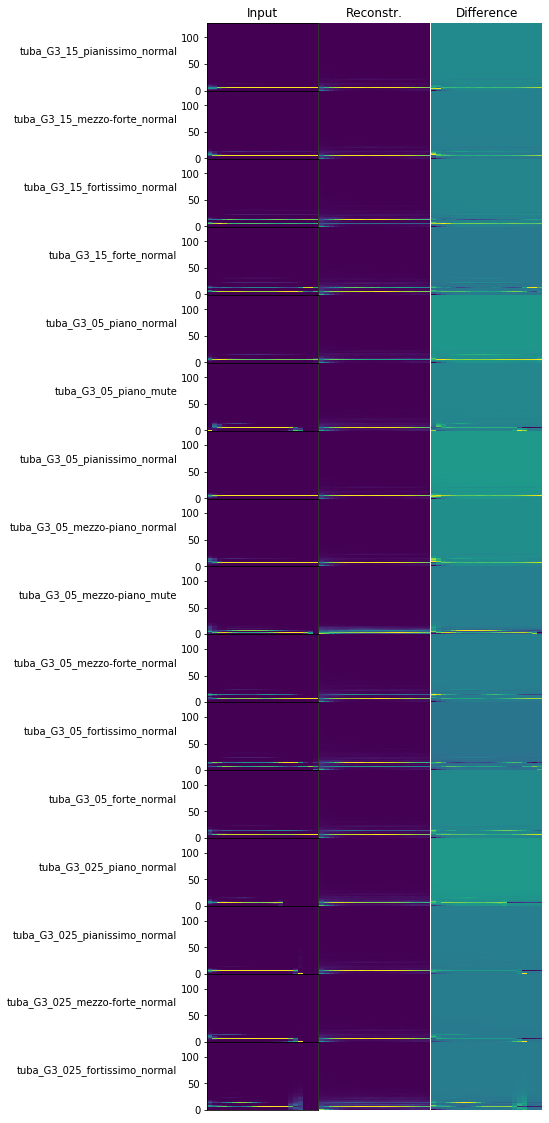

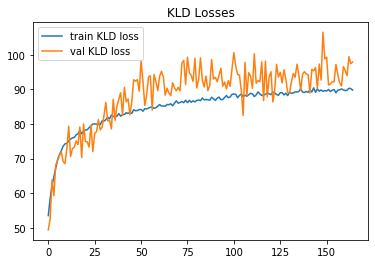

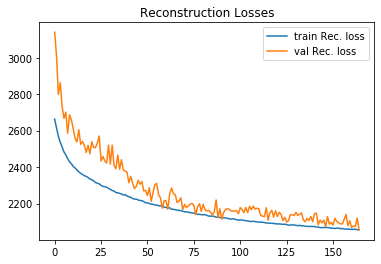

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 171


100%|██████████| 727/727 [00:09<00:00, 72.73it/s]

training_avg_loss=2505.18
 training_avg_kld=89.92
 training_avg_rec=2055.60




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2552.84

Epoch: 172


100%|██████████| 727/727 [00:10<00:00, 71.53it/s]

training_avg_loss=2501.73
 training_avg_kld=89.71
 training_avg_rec=2053.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2575.25

Epoch: 173


100%|██████████| 727/727 [00:10<00:00, 71.78it/s]

training_avg_loss=2508.19
 training_avg_kld=90.97
 training_avg_rec=2053.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2532.32

Epoch: 174


100%|██████████| 727/727 [00:10<00:00, 71.43it/s]


training_avg_loss=2502.42
 training_avg_kld=90.00
 training_avg_rec=2052.43



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2572.07

Epoch: 175


100%|██████████| 727/727 [00:10<00:00, 71.49it/s]


training_avg_loss=2500.62
 training_avg_kld=89.83
 training_avg_rec=2051.49



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2571.64

Epoch: 176


100%|██████████| 727/727 [00:10<00:00, 71.60it/s]

training_avg_loss=2498.09
 training_avg_kld=89.45
 training_avg_rec=2050.82




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2540.15

Epoch: 177


100%|██████████| 727/727 [00:10<00:00, 71.80it/s]

training_avg_loss=2499.81
 training_avg_kld=89.66
 training_avg_rec=2051.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2555.98

Epoch: 178


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]

training_avg_loss=2502.65
 training_avg_kld=90.45
 training_avg_rec=2050.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2533.11

Epoch: 179


100%|██████████| 727/727 [00:10<00:00, 71.60it/s]

training_avg_loss=2500.79
 training_avg_kld=89.96
 training_avg_rec=2050.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2578.84

Epoch: 180


100%|██████████| 727/727 [00:10<00:00, 71.51it/s]

training_avg_loss=2503.43
 training_avg_kld=90.62
 training_avg_rec=2050.33



val_avg_loss=2552.53



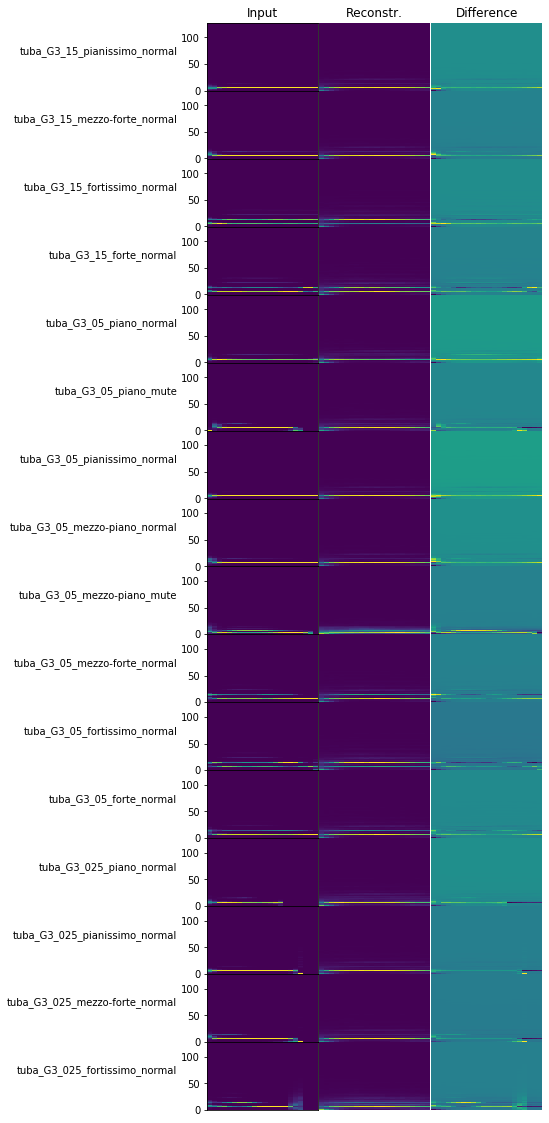

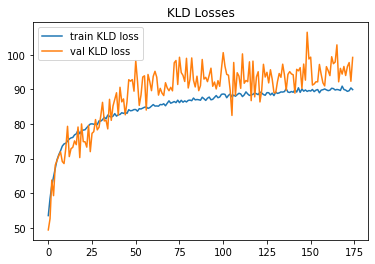

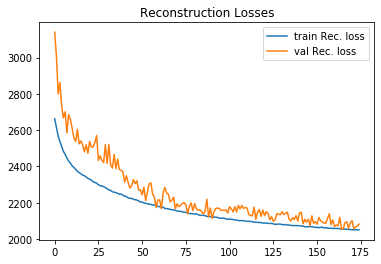

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 181


100%|██████████| 727/727 [00:10<00:00, 72.59it/s]

training_avg_loss=2501.80
 training_avg_kld=90.28
 training_avg_rec=2050.39




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2563.49

Epoch: 182


100%|██████████| 727/727 [00:10<00:00, 71.65it/s]

training_avg_loss=2500.04
 training_avg_kld=90.60
 training_avg_rec=2047.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2543.90

Epoch: 183


100%|██████████| 727/727 [00:10<00:00, 71.52it/s]

training_avg_loss=2500.09
 training_avg_kld=90.48
 training_avg_rec=2047.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2548.73

Epoch: 184


100%|██████████| 727/727 [00:10<00:00, 71.75it/s]

training_avg_loss=2498.04
 training_avg_kld=90.42
 training_avg_rec=2045.96




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2559.39

Epoch: 185


100%|██████████| 727/727 [00:10<00:00, 71.88it/s]


training_avg_loss=2498.63
 training_avg_kld=90.57
 training_avg_rec=2045.80



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2568.23

Epoch: 186


100%|██████████| 727/727 [00:10<00:00, 71.61it/s]

training_avg_loss=2499.67
 training_avg_kld=90.57
 training_avg_rec=2046.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2554.59

Epoch: 187


100%|██████████| 727/727 [00:10<00:00, 71.88it/s]

training_avg_loss=2498.34
 training_avg_kld=90.52
 training_avg_rec=2045.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.01

Epoch: 188


100%|██████████| 727/727 [00:10<00:00, 71.31it/s]

training_avg_loss=2498.84
 training_avg_kld=90.71
 training_avg_rec=2045.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2545.05

Epoch: 189


100%|██████████| 727/727 [00:10<00:00, 71.59it/s]

training_avg_loss=2496.70
 training_avg_kld=90.38
 training_avg_rec=2044.81




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2591.87

Epoch: 190


100%|██████████| 727/727 [00:10<00:00, 71.09it/s]

training_avg_loss=2497.24
 training_avg_kld=90.73
 training_avg_rec=2043.57



val_avg_loss=2541.44



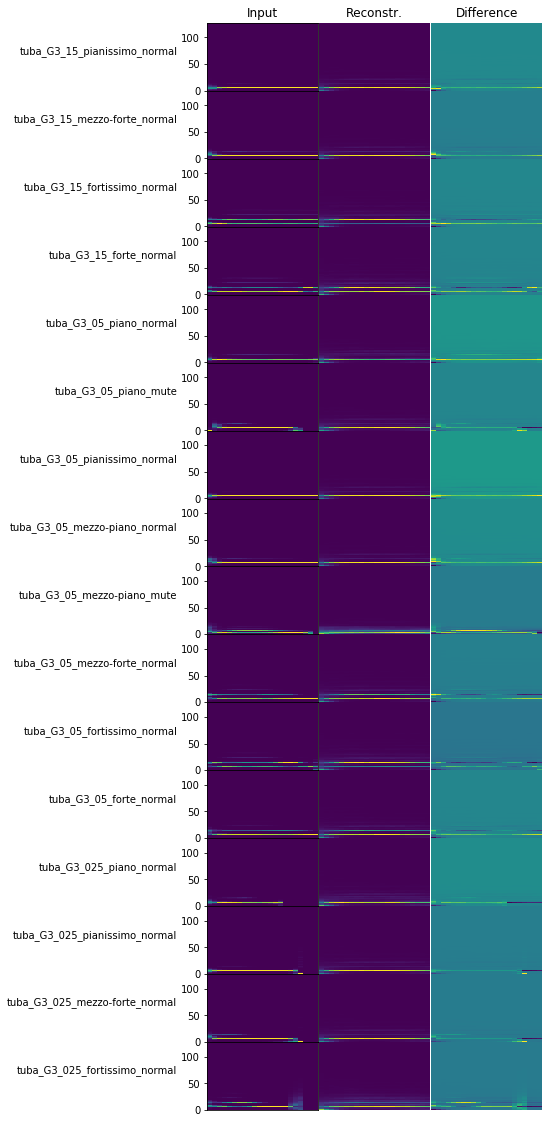

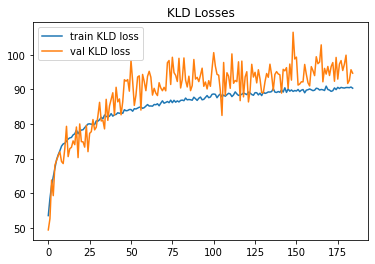

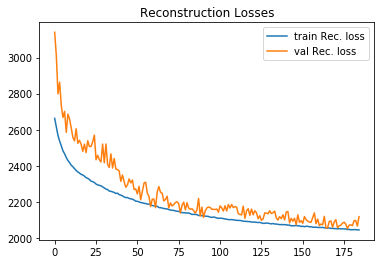

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 191


100%|██████████| 727/727 [00:10<00:00, 72.32it/s]

training_avg_loss=2496.42
 training_avg_kld=90.28
 training_avg_rec=2045.03




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2564.13

Epoch: 192


100%|██████████| 727/727 [00:10<00:00, 71.53it/s]

training_avg_loss=2495.09
 training_avg_kld=90.15
 training_avg_rec=2044.34




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2545.62

Epoch: 193


100%|██████████| 727/727 [00:10<00:00, 71.41it/s]

training_avg_loss=2499.37
 training_avg_kld=90.76
 training_avg_rec=2045.55




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2564.40

Epoch: 194


100%|██████████| 727/727 [00:10<00:00, 71.22it/s]

training_avg_loss=2498.59
 training_avg_kld=91.23
 training_avg_rec=2042.41




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2582.53

Epoch: 195


100%|██████████| 727/727 [00:10<00:00, 71.62it/s]


training_avg_loss=2494.38
 training_avg_kld=90.46
 training_avg_rec=2042.09



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2550.03

Epoch: 196


100%|██████████| 727/727 [00:10<00:00, 71.65it/s]

training_avg_loss=2492.85
 training_avg_kld=90.54
 training_avg_rec=2040.16




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2563.36

Epoch: 197


100%|██████████| 727/727 [00:10<00:00, 71.63it/s]

training_avg_loss=2496.67
 training_avg_kld=91.20
 training_avg_rec=2040.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2573.23

Epoch: 198


100%|██████████| 727/727 [00:10<00:00, 71.28it/s]

training_avg_loss=2490.95
 training_avg_kld=90.56
 training_avg_rec=2038.17




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2550.81

Epoch: 199


100%|██████████| 727/727 [00:10<00:00, 71.16it/s]

training_avg_loss=2493.71
 training_avg_kld=90.50
 training_avg_rec=2041.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.95

Epoch: 200


100%|██████████| 727/727 [00:10<00:00, 71.61it/s]

training_avg_loss=2492.88
 training_avg_kld=90.88
 training_avg_rec=2038.46



val_avg_loss=2554.42



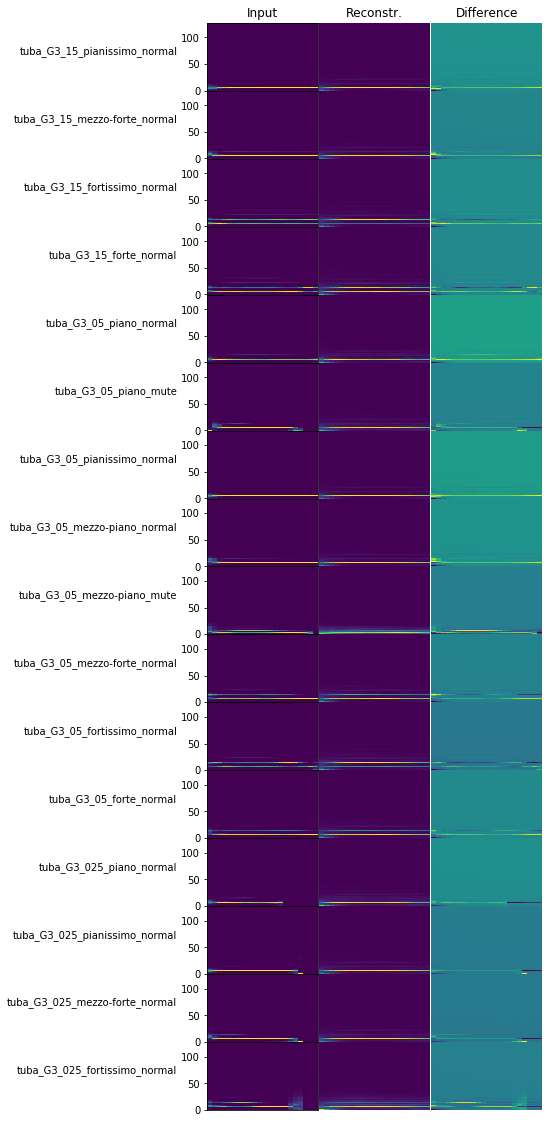

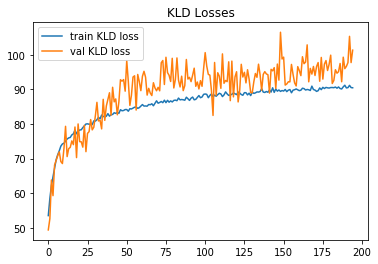

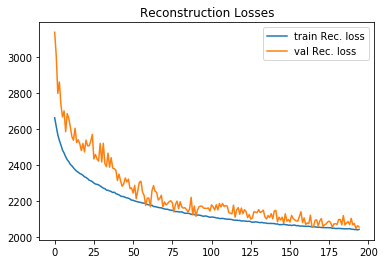

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 201


100%|██████████| 727/727 [00:10<00:00, 72.24it/s]

training_avg_loss=2491.39
 training_avg_kld=90.52
 training_avg_rec=2038.80




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2570.38

Epoch: 202


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2492.98
 training_avg_kld=90.91
 training_avg_rec=2038.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2573.54

Epoch: 203


100%|██████████| 727/727 [00:10<00:00, 71.67it/s]

training_avg_loss=2488.91
 training_avg_kld=90.46
 training_avg_rec=2036.59




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.61

Epoch: 204


100%|██████████| 727/727 [00:10<00:00, 71.62it/s]


training_avg_loss=2491.87
 training_avg_kld=90.45
 training_avg_rec=2039.62



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2583.24

Epoch: 205


100%|██████████| 727/727 [00:10<00:00, 71.47it/s]


training_avg_loss=2491.27
 training_avg_kld=91.23
 training_avg_rec=2035.10



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2564.80

Epoch: 206


100%|██████████| 727/727 [00:10<00:00, 71.44it/s]

training_avg_loss=2491.78
 training_avg_kld=91.07
 training_avg_rec=2036.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2561.23

Epoch: 207


100%|██████████| 727/727 [00:10<00:00, 71.64it/s]

training_avg_loss=2489.56
 training_avg_kld=90.88
 training_avg_rec=2035.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.84

Epoch: 208


100%|██████████| 727/727 [00:10<00:00, 71.53it/s]


training_avg_loss=2489.42
 training_avg_kld=90.82
 training_avg_rec=2035.33



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2554.10

Epoch: 209


100%|██████████| 727/727 [00:10<00:00, 71.76it/s]

training_avg_loss=2491.37
 training_avg_kld=91.54
 training_avg_rec=2033.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2555.01

Epoch: 210


100%|██████████| 727/727 [00:10<00:00, 71.34it/s]

training_avg_loss=2489.05
 training_avg_kld=90.84
 training_avg_rec=2034.85



val_avg_loss=2614.06



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

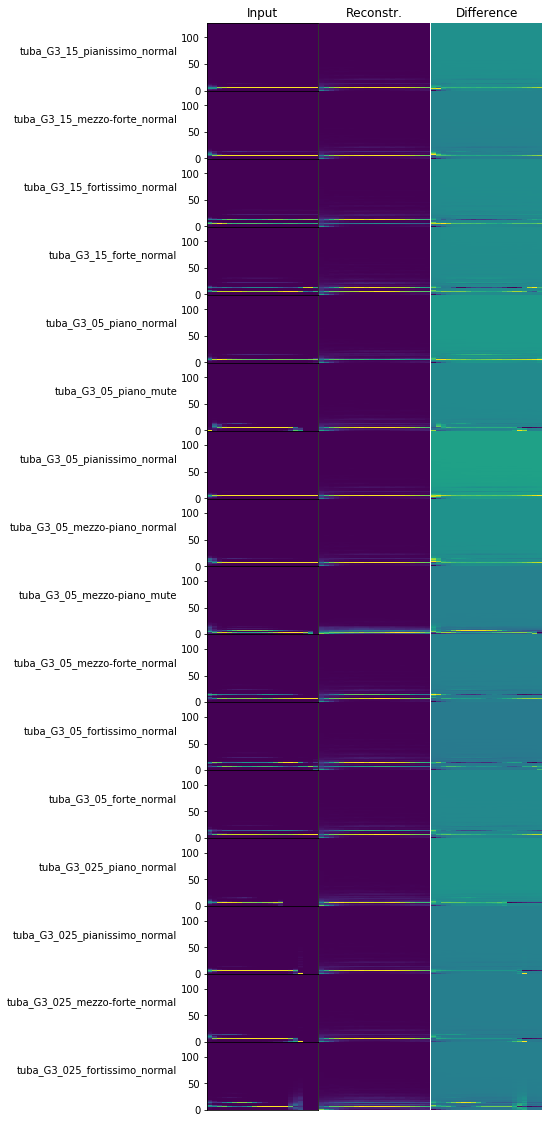

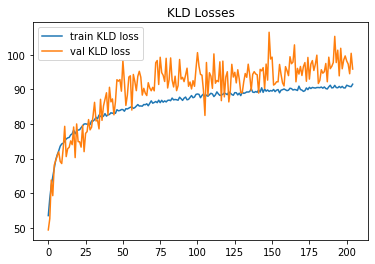

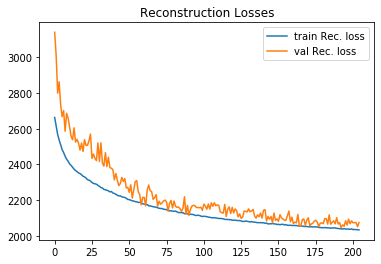

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 211


100%|██████████| 727/727 [00:10<00:00, 72.55it/s]


training_avg_loss=2490.39
 training_avg_kld=91.20
 training_avg_rec=2034.41



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2548.63

Epoch: 212


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]

training_avg_loss=2489.50
 training_avg_kld=91.20
 training_avg_rec=2033.53




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2536.84

Epoch: 213


100%|██████████| 727/727 [00:10<00:00, 71.77it/s]


training_avg_loss=2488.51
 training_avg_kld=91.33
 training_avg_rec=2031.86



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2535.36

Epoch: 214


100%|██████████| 727/727 [00:10<00:00, 71.30it/s]

training_avg_loss=2489.96
 training_avg_kld=91.64
 training_avg_rec=2031.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2559.22

Epoch: 215


100%|██████████| 727/727 [00:10<00:00, 71.82it/s]

training_avg_loss=2488.20
 training_avg_kld=91.26
 training_avg_rec=2031.91




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2557.72

Epoch: 216


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]

training_avg_loss=2490.79
 training_avg_kld=91.76
 training_avg_rec=2031.99




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2579.01

Epoch: 217


100%|██████████| 727/727 [00:10<00:00, 71.49it/s]

training_avg_loss=2485.92
 training_avg_kld=90.85
 training_avg_rec=2031.67




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2567.68

Epoch: 218


100%|██████████| 727/727 [00:10<00:00, 71.59it/s]


training_avg_loss=2488.61
 training_avg_kld=91.51
 training_avg_rec=2031.04



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2534.58

Epoch: 219


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2486.40
 training_avg_kld=91.33
 training_avg_rec=2029.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2545.81

Epoch: 220


100%|██████████| 727/727 [00:10<00:00, 71.52it/s]

training_avg_loss=2488.32
 training_avg_kld=91.44
 training_avg_rec=2031.12



val_avg_loss=2551.27



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

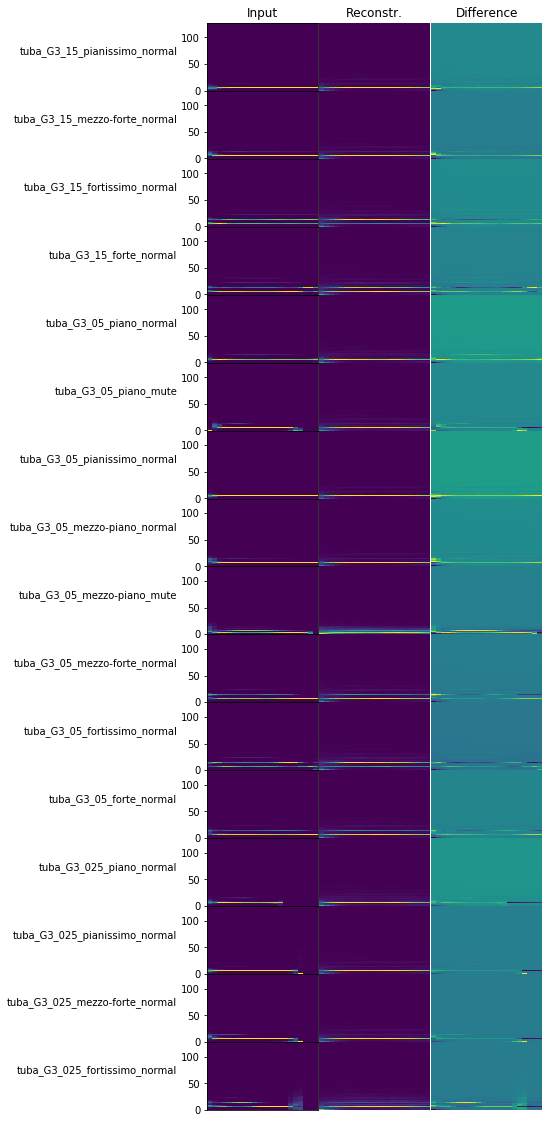

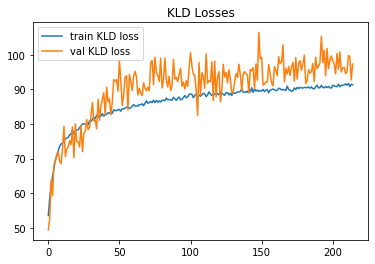

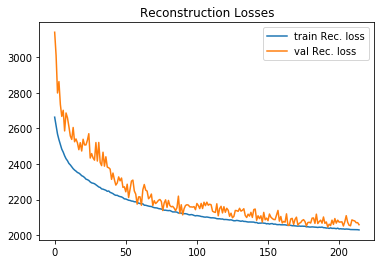

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 221


100%|██████████| 727/727 [00:10<00:00, 72.61it/s]

training_avg_loss=2486.49
 training_avg_kld=91.26
 training_avg_rec=2030.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.45

Epoch: 222


100%|██████████| 727/727 [00:10<00:00, 71.74it/s]


training_avg_loss=2487.45
 training_avg_kld=91.59
 training_avg_rec=2029.49



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2570.91

Epoch: 223


100%|██████████| 727/727 [00:10<00:00, 71.67it/s]

training_avg_loss=2486.99
 training_avg_kld=91.52
 training_avg_rec=2029.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.79

Epoch: 224


100%|██████████| 727/727 [00:10<00:00, 71.20it/s]

training_avg_loss=2483.20
 training_avg_kld=91.18
 training_avg_rec=2027.31




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2546.74

Epoch: 225


100%|██████████| 727/727 [00:10<00:00, 71.32it/s]

training_avg_loss=2484.23
 training_avg_kld=91.26
 training_avg_rec=2027.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2566.31

Epoch: 226


100%|██████████| 727/727 [00:10<00:00, 71.50it/s]

training_avg_loss=2484.02
 training_avg_kld=91.26
 training_avg_rec=2027.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2563.77

Epoch: 227


100%|██████████| 727/727 [00:10<00:00, 71.32it/s]

training_avg_loss=2483.44
 training_avg_kld=91.44
 training_avg_rec=2026.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2543.56

Epoch: 228


100%|██████████| 727/727 [00:10<00:00, 71.62it/s]

training_avg_loss=2484.46
 training_avg_kld=91.22
 training_avg_rec=2028.35




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.07

Epoch: 229


100%|██████████| 727/727 [00:10<00:00, 71.71it/s]

training_avg_loss=2483.56
 training_avg_kld=91.26
 training_avg_rec=2027.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2533.58

Epoch: 230


100%|██████████| 727/727 [00:10<00:00, 70.98it/s]

training_avg_loss=2484.94
 training_avg_kld=91.29
 training_avg_rec=2028.52



val_avg_loss=2579.43



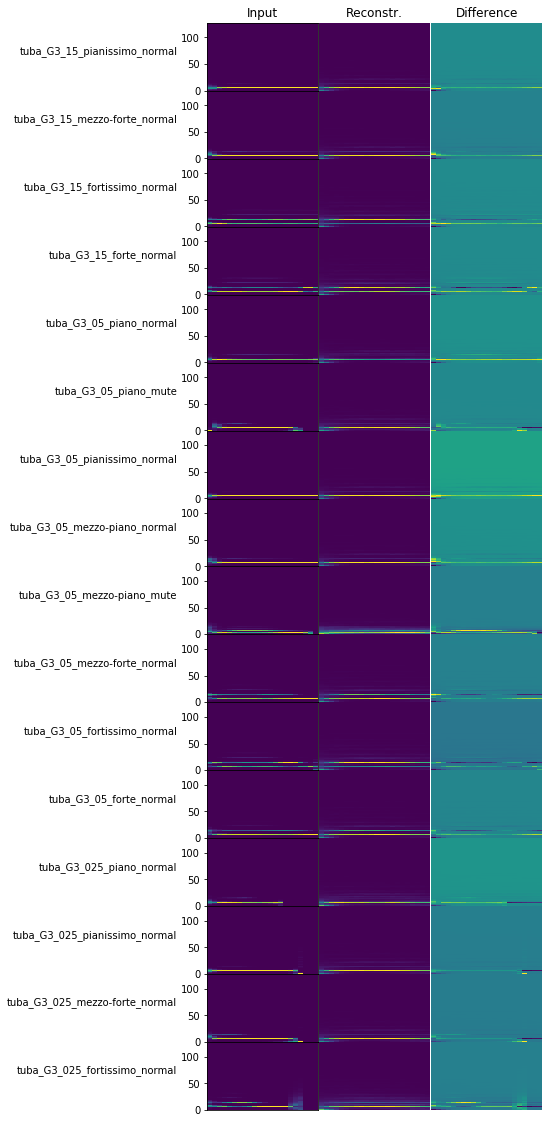

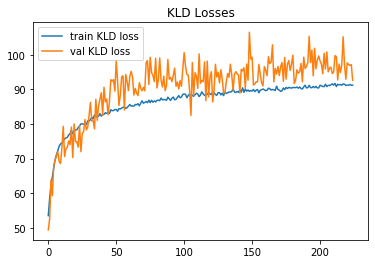

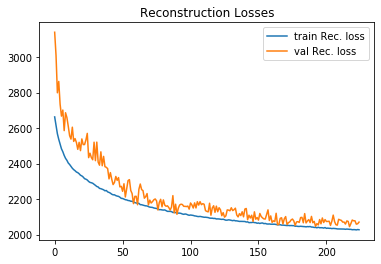

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 231


100%|██████████| 727/727 [00:10<00:00, 72.46it/s]


training_avg_loss=2483.91
 training_avg_kld=91.29
 training_avg_rec=2027.45



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2535.77

Epoch: 232


100%|██████████| 727/727 [00:10<00:00, 71.45it/s]


training_avg_loss=2483.67
 training_avg_kld=91.72
 training_avg_rec=2025.05



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2544.42

Epoch: 233


100%|██████████| 727/727 [00:10<00:00, 71.55it/s]

training_avg_loss=2484.37
 training_avg_kld=91.65
 training_avg_rec=2026.13




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2559.92

Epoch: 234


100%|██████████| 727/727 [00:10<00:00, 71.10it/s]

training_avg_loss=2483.76
 training_avg_kld=91.71
 training_avg_rec=2025.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2568.41

Epoch: 235


100%|██████████| 727/727 [00:10<00:00, 71.48it/s]

training_avg_loss=2481.93
 training_avg_kld=91.54
 training_avg_rec=2024.20




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2552.97

Epoch: 236


100%|██████████| 727/727 [00:10<00:00, 71.55it/s]


training_avg_loss=2481.10
 training_avg_kld=91.09
 training_avg_rec=2025.66



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2555.67

Epoch: 237


100%|██████████| 727/727 [00:10<00:00, 71.39it/s]

training_avg_loss=2483.36
 training_avg_kld=91.65
 training_avg_rec=2025.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2541.34

Epoch: 238


100%|██████████| 727/727 [00:10<00:00, 71.92it/s]


training_avg_loss=2479.58
 training_avg_kld=91.27
 training_avg_rec=2023.23



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2544.36

Epoch: 239


100%|██████████| 727/727 [00:10<00:00, 71.56it/s]

training_avg_loss=2481.02
 training_avg_kld=91.96
 training_avg_rec=2021.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2537.94

Epoch: 240


100%|██████████| 727/727 [00:10<00:00, 71.33it/s]

training_avg_loss=2480.99
 training_avg_kld=91.96
 training_avg_rec=2021.20



val_avg_loss=2556.16



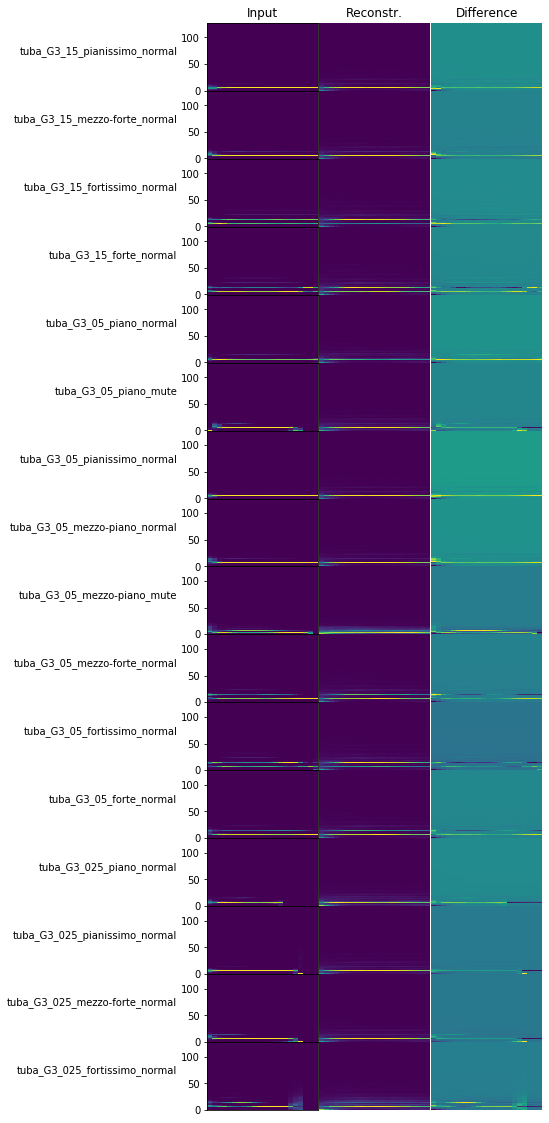

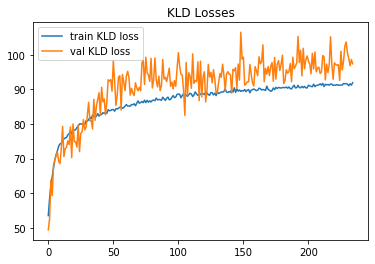

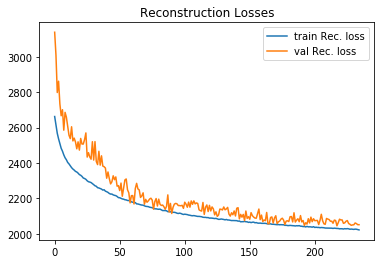

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 241


100%|██████████| 727/727 [00:10<00:00, 71.89it/s]

training_avg_loss=2479.70
 training_avg_kld=91.56
 training_avg_rec=2021.88




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2559.61

Epoch: 242


100%|██████████| 727/727 [00:10<00:00, 71.50it/s]

training_avg_loss=2479.28
 training_avg_kld=91.58
 training_avg_rec=2021.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2539.42

Epoch: 243


100%|██████████| 727/727 [00:10<00:00, 71.71it/s]


training_avg_loss=2479.62
 training_avg_kld=91.72
 training_avg_rec=2021.02



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2558.06

Epoch: 244


100%|██████████| 727/727 [00:10<00:00, 71.50it/s]

training_avg_loss=2477.73
 training_avg_kld=91.86
 training_avg_rec=2018.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2543.40

Epoch: 245


100%|██████████| 727/727 [00:10<00:00, 71.83it/s]

training_avg_loss=2479.29
 training_avg_kld=91.81
 training_avg_rec=2020.27




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2561.60

Epoch: 246


100%|██████████| 727/727 [00:10<00:00, 71.83it/s]

training_avg_loss=2477.94
 training_avg_kld=91.58
 training_avg_rec=2020.05




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2534.01

Epoch: 247


100%|██████████| 727/727 [00:10<00:00, 71.74it/s]

training_avg_loss=2477.79
 training_avg_kld=91.34
 training_avg_rec=2021.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2552.65

Epoch: 248


100%|██████████| 727/727 [00:10<00:00, 71.61it/s]


training_avg_loss=2479.16
 training_avg_kld=91.86
 training_avg_rec=2019.88



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2546.38

Epoch: 249


100%|██████████| 727/727 [00:10<00:00, 71.74it/s]

training_avg_loss=2477.73
 training_avg_kld=92.09
 training_avg_rec=2017.28




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2556.88

Epoch: 250


100%|██████████| 727/727 [00:10<00:00, 71.22it/s]

training_avg_loss=2476.94
 training_avg_kld=91.63
 training_avg_rec=2018.78



val_avg_loss=2551.16



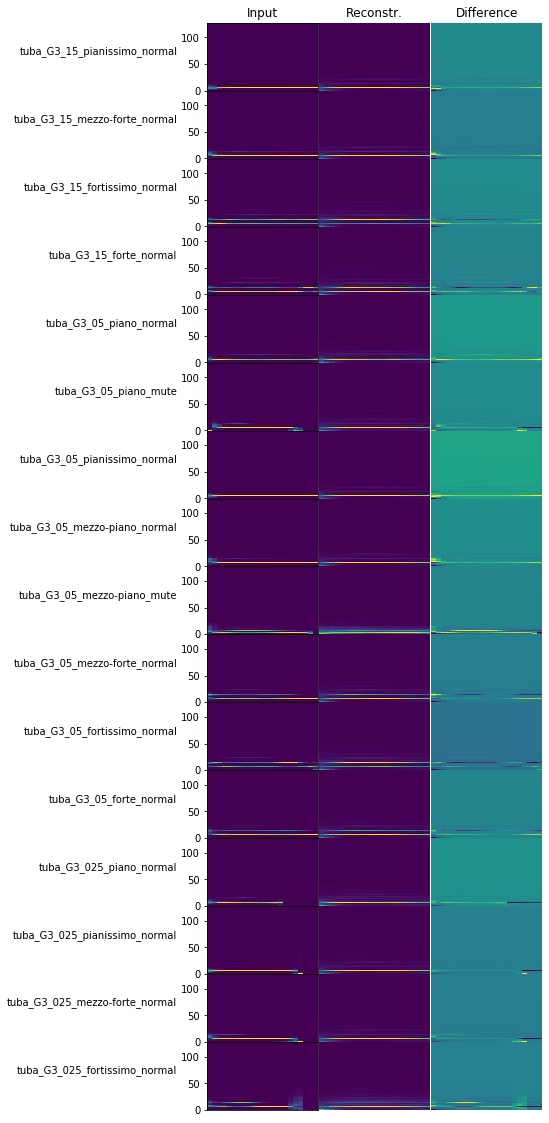

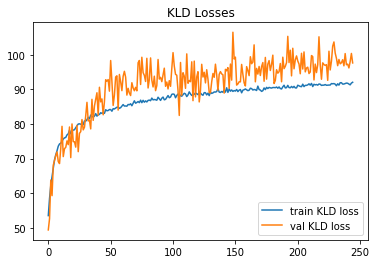

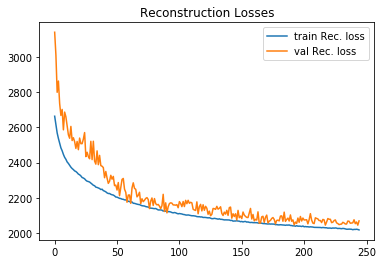

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 251


100%|██████████| 727/727 [00:10<00:00, 72.61it/s]


training_avg_loss=2475.01
 training_avg_kld=91.48
 training_avg_rec=2017.59



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2523.26

Epoch: 252


100%|██████████| 727/727 [00:10<00:00, 71.77it/s]

training_avg_loss=2476.20
 training_avg_kld=91.49
 training_avg_rec=2018.76




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2546.81

Epoch: 253


100%|██████████| 727/727 [00:10<00:00, 71.55it/s]

training_avg_loss=2476.61
 training_avg_kld=91.97
 training_avg_rec=2016.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2542.75

Epoch: 254


100%|██████████| 727/727 [00:10<00:00, 71.45it/s]

training_avg_loss=2474.92
 training_avg_kld=91.48
 training_avg_rec=2017.49




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2554.57

Epoch: 255


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]


training_avg_loss=2476.29
 training_avg_kld=91.84
 training_avg_rec=2017.09



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2543.55

Epoch: 256


100%|██████████| 727/727 [00:10<00:00, 71.63it/s]


training_avg_loss=2476.39
 training_avg_kld=91.48
 training_avg_rec=2018.99



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2546.12

Epoch: 257


100%|██████████| 727/727 [00:10<00:00, 71.70it/s]

training_avg_loss=2477.60
 training_avg_kld=92.22
 training_avg_rec=2016.52




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2555.70

Epoch: 258


100%|██████████| 727/727 [00:10<00:00, 71.42it/s]

training_avg_loss=2476.41
 training_avg_kld=92.06
 training_avg_rec=2016.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.98

Epoch: 259


100%|██████████| 727/727 [00:10<00:00, 71.45it/s]

training_avg_loss=2475.52
 training_avg_kld=91.88
 training_avg_rec=2016.14




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2548.35

Epoch: 260


100%|██████████| 727/727 [00:10<00:00, 71.81it/s]

training_avg_loss=2477.36
 training_avg_kld=92.46
 training_avg_rec=2015.07



val_avg_loss=2550.63



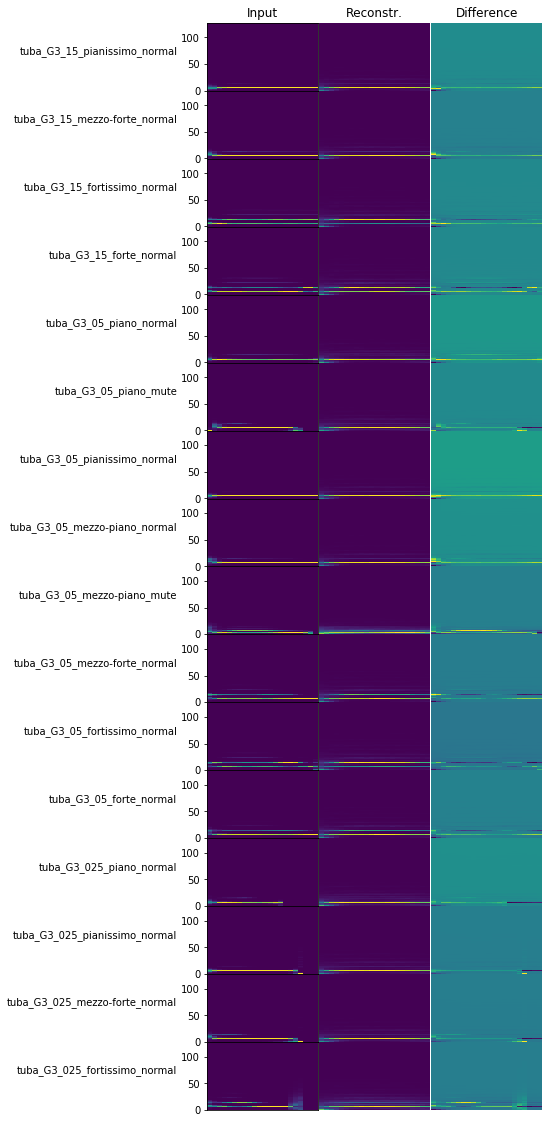

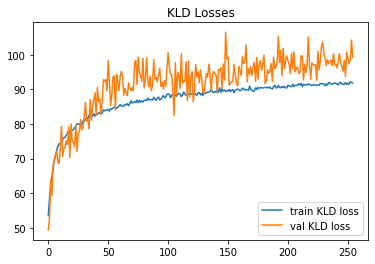

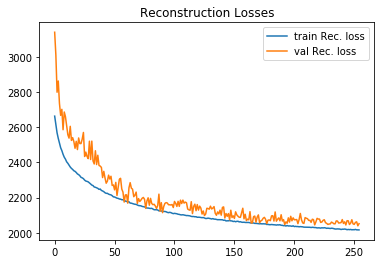

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 261


100%|██████████| 727/727 [00:10<00:00, 72.56it/s]

training_avg_loss=2473.78
 training_avg_kld=91.80
 training_avg_rec=2014.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2539.31

Epoch: 262


100%|██████████| 727/727 [00:10<00:00, 71.53it/s]

training_avg_loss=2473.09
 training_avg_kld=91.78
 training_avg_rec=2014.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2529.99

Epoch: 263


100%|██████████| 727/727 [00:10<00:00, 71.01it/s]

training_avg_loss=2471.92
 training_avg_kld=91.80
 training_avg_rec=2012.94




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2553.34

Epoch: 264


100%|██████████| 727/727 [00:10<00:00, 71.54it/s]

training_avg_loss=2473.94
 training_avg_kld=92.14
 training_avg_rec=2013.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.23

Epoch: 265


100%|██████████| 727/727 [00:10<00:00, 71.23it/s]


training_avg_loss=2472.72
 training_avg_kld=91.60
 training_avg_rec=2014.70



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2601.47

Epoch: 266


100%|██████████| 727/727 [00:10<00:00, 71.23it/s]


training_avg_loss=2476.05
 training_avg_kld=92.46
 training_avg_rec=2013.74



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2553.22

Epoch: 267


100%|██████████| 727/727 [00:10<00:00, 71.79it/s]

training_avg_loss=2476.65
 training_avg_kld=92.24
 training_avg_rec=2015.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2538.66

Epoch: 268


100%|██████████| 727/727 [00:10<00:00, 71.27it/s]

training_avg_loss=2471.82
 training_avg_kld=91.96
 training_avg_rec=2012.04




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2545.13

Epoch: 269


100%|██████████| 727/727 [00:10<00:00, 71.25it/s]

training_avg_loss=2471.19
 training_avg_kld=91.75
 training_avg_rec=2012.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2541.49

Epoch: 270


100%|██████████| 727/727 [00:10<00:00, 71.43it/s]

training_avg_loss=2471.44
 training_avg_kld=91.88
 training_avg_rec=2012.06



val_avg_loss=2545.31



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

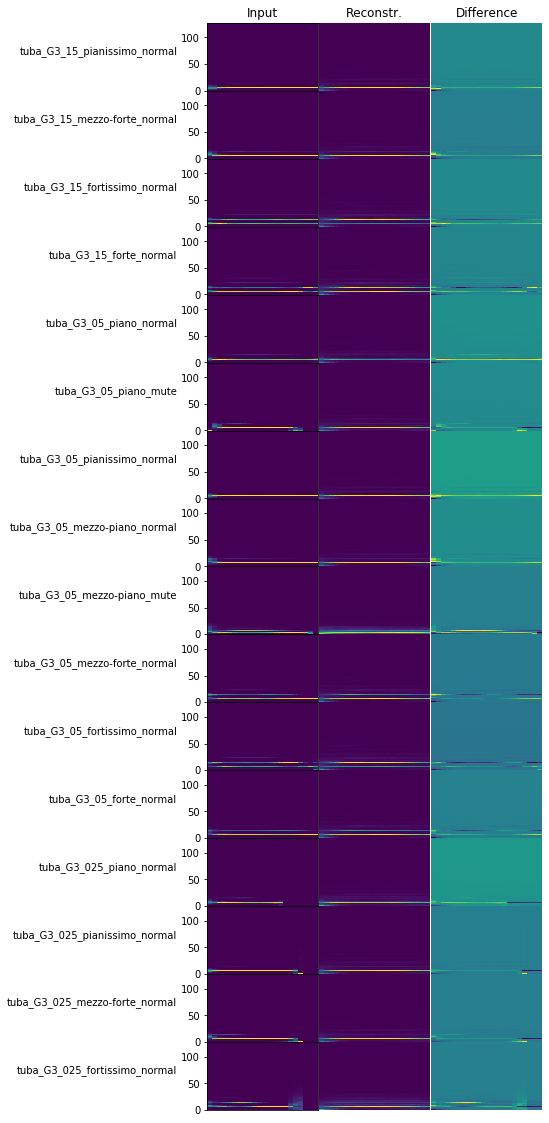

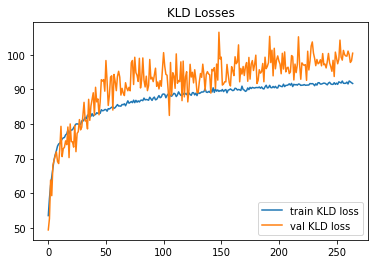

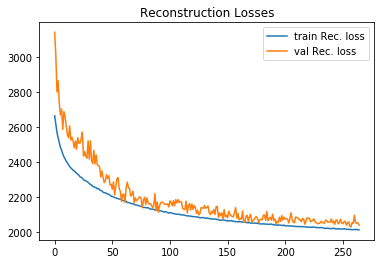

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 271


100%|██████████| 727/727 [00:10<00:00, 72.22it/s]

training_avg_loss=2475.25
 training_avg_kld=92.77
 training_avg_rec=2011.38




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2550.31

Epoch: 272


100%|██████████| 727/727 [00:10<00:00, 71.75it/s]

training_avg_loss=2470.47
 training_avg_kld=91.91
 training_avg_rec=2010.93




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2539.49

Epoch: 273


100%|██████████| 727/727 [00:10<00:00, 71.77it/s]

training_avg_loss=2473.02
 training_avg_kld=92.13
 training_avg_rec=2012.36




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2532.29

Epoch: 274


100%|██████████| 727/727 [00:10<00:00, 71.60it/s]

training_avg_loss=2472.19
 training_avg_kld=92.11
 training_avg_rec=2011.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2519.94

Epoch: 275


100%|██████████| 727/727 [00:10<00:00, 71.84it/s]

training_avg_loss=2470.06
 training_avg_kld=91.92
 training_avg_rec=2010.47




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2568.51

Epoch: 276


100%|██████████| 727/727 [00:10<00:00, 71.46it/s]

training_avg_loss=2467.06
 training_avg_kld=91.80
 training_avg_rec=2008.09




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.37

Epoch: 277


100%|██████████| 727/727 [00:10<00:00, 71.01it/s]

training_avg_loss=2469.11
 training_avg_kld=91.78
 training_avg_rec=2010.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2540.85

Epoch: 278


100%|██████████| 727/727 [00:10<00:00, 71.44it/s]

training_avg_loss=2474.37
 training_avg_kld=92.34
 training_avg_rec=2012.64




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.18

Epoch: 279


100%|██████████| 727/727 [00:10<00:00, 71.22it/s]

training_avg_loss=2467.75
 training_avg_kld=91.72
 training_avg_rec=2009.18




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2533.68

Epoch: 280


100%|██████████| 727/727 [00:10<00:00, 71.39it/s]

training_avg_loss=2468.58
 training_avg_kld=92.05
 training_avg_rec=2008.33



val_avg_loss=2537.50



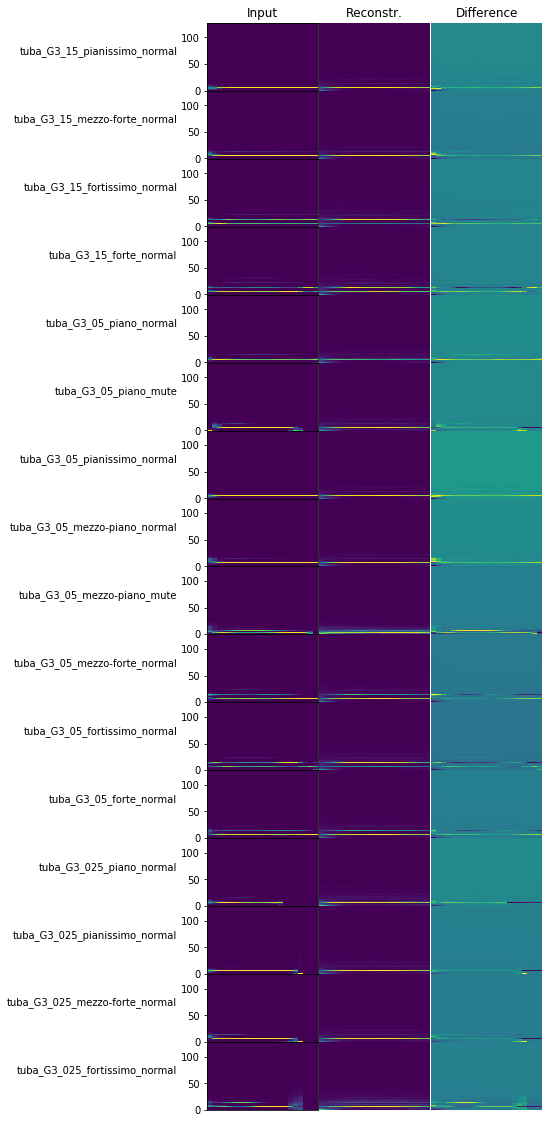

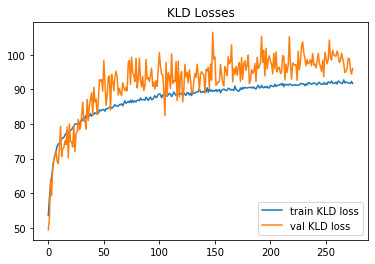

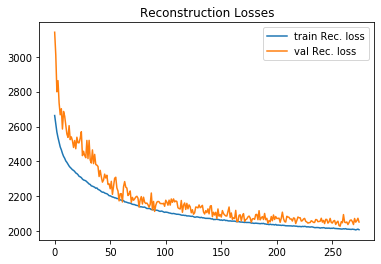

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 281


100%|██████████| 727/727 [00:10<00:00, 72.45it/s]


training_avg_loss=2469.67
 training_avg_kld=92.23
 training_avg_rec=2008.52



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2514.31

Epoch: 282


100%|██████████| 727/727 [00:10<00:00, 71.57it/s]


training_avg_loss=2472.02
 training_avg_kld=92.18
 training_avg_rec=2011.14



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2535.57

Epoch: 283


100%|██████████| 727/727 [00:10<00:00, 71.20it/s]

training_avg_loss=2470.34
 training_avg_kld=92.51
 training_avg_rec=2007.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2532.16

Epoch: 284


100%|██████████| 727/727 [00:10<00:00, 71.19it/s]

training_avg_loss=2468.27
 training_avg_kld=92.25
 training_avg_rec=2007.01




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2554.15

Epoch: 285


100%|██████████| 727/727 [00:10<00:00, 71.68it/s]


training_avg_loss=2467.81
 training_avg_kld=92.30
 training_avg_rec=2006.29



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2535.96

Epoch: 286


100%|██████████| 727/727 [00:10<00:00, 71.05it/s]

training_avg_loss=2467.39
 training_avg_kld=91.96
 training_avg_rec=2007.58




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2540.83

Epoch: 287


100%|██████████| 727/727 [00:10<00:00, 71.49it/s]

training_avg_loss=2466.68
 training_avg_kld=92.38
 training_avg_rec=2004.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2562.48

Epoch: 288


100%|██████████| 727/727 [00:10<00:00, 70.96it/s]

training_avg_loss=2469.91
 training_avg_kld=92.62
 training_avg_rec=2006.83




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2545.32

Epoch: 289


100%|██████████| 727/727 [00:10<00:00, 71.46it/s]

training_avg_loss=2469.37
 training_avg_kld=92.25
 training_avg_rec=2008.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.16

Epoch: 290


100%|██████████| 727/727 [00:10<00:00, 71.73it/s]

training_avg_loss=2466.46
 training_avg_kld=92.45
 training_avg_rec=2004.23



val_avg_loss=2537.08



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

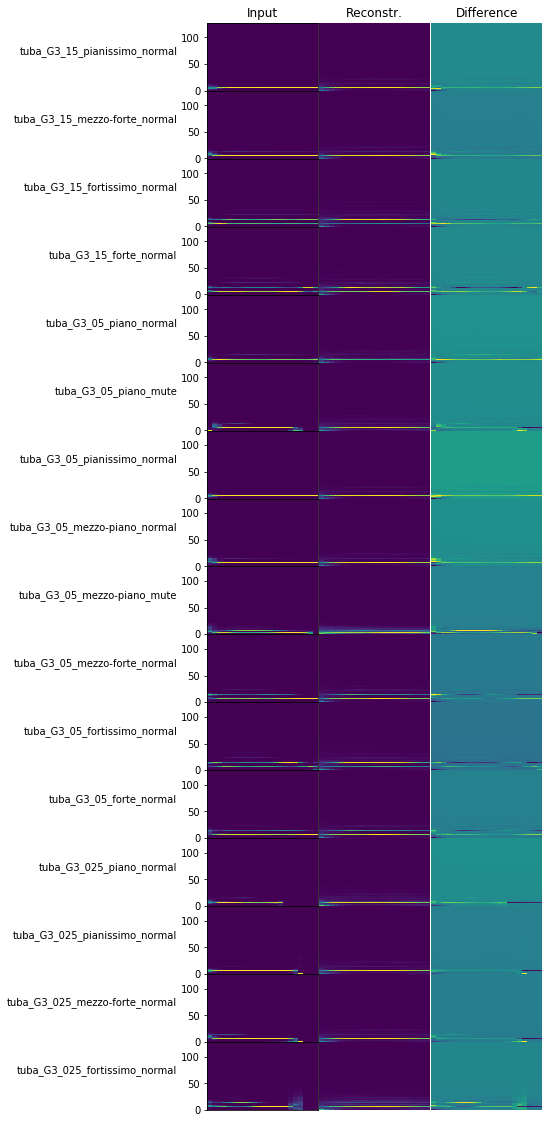

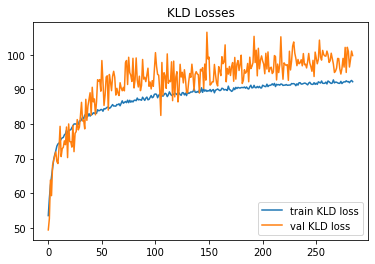

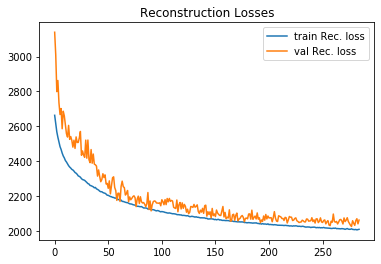

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 291


100%|██████████| 727/727 [00:10<00:00, 72.35it/s]

training_avg_loss=2469.64
 training_avg_kld=92.51
 training_avg_rec=2007.11




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2537.71

Epoch: 292


100%|██████████| 727/727 [00:10<00:00, 70.90it/s]

training_avg_loss=2465.51
 training_avg_kld=92.15
 training_avg_rec=2004.78




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.68

Epoch: 293


100%|██████████| 727/727 [00:10<00:00, 71.65it/s]

training_avg_loss=2465.24
 training_avg_kld=91.92
 training_avg_rec=2005.66




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2538.19

Epoch: 294


100%|██████████| 727/727 [00:10<00:00, 71.41it/s]

training_avg_loss=2469.66
 training_avg_kld=92.83
 training_avg_rec=2005.50




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2551.12

Epoch: 295


100%|██████████| 727/727 [00:10<00:00, 71.35it/s]


training_avg_loss=2465.56
 training_avg_kld=92.12
 training_avg_rec=2004.95



  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2543.10

Epoch: 296


100%|██████████| 727/727 [00:10<00:00, 71.55it/s]

training_avg_loss=2467.52
 training_avg_kld=92.57
 training_avg_rec=2004.69




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2552.80

Epoch: 297


100%|██████████| 727/727 [00:10<00:00, 72.01it/s]

training_avg_loss=2464.86
 training_avg_kld=92.52
 training_avg_rec=2002.26




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2555.59

Epoch: 298


100%|██████████| 727/727 [00:10<00:00, 71.27it/s]

training_avg_loss=2469.03
 training_avg_kld=92.87
 training_avg_rec=2004.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2552.44

Epoch: 299


100%|██████████| 727/727 [00:10<00:00, 71.02it/s]

training_avg_loss=2465.42
 training_avg_kld=92.55
 training_avg_rec=2002.65




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2556.69

Epoch: 300


100%|██████████| 727/727 [00:10<00:00, 71.42it/s]

training_avg_loss=2468.11
 training_avg_kld=92.66
 training_avg_rec=2004.79



val_avg_loss=2533.63



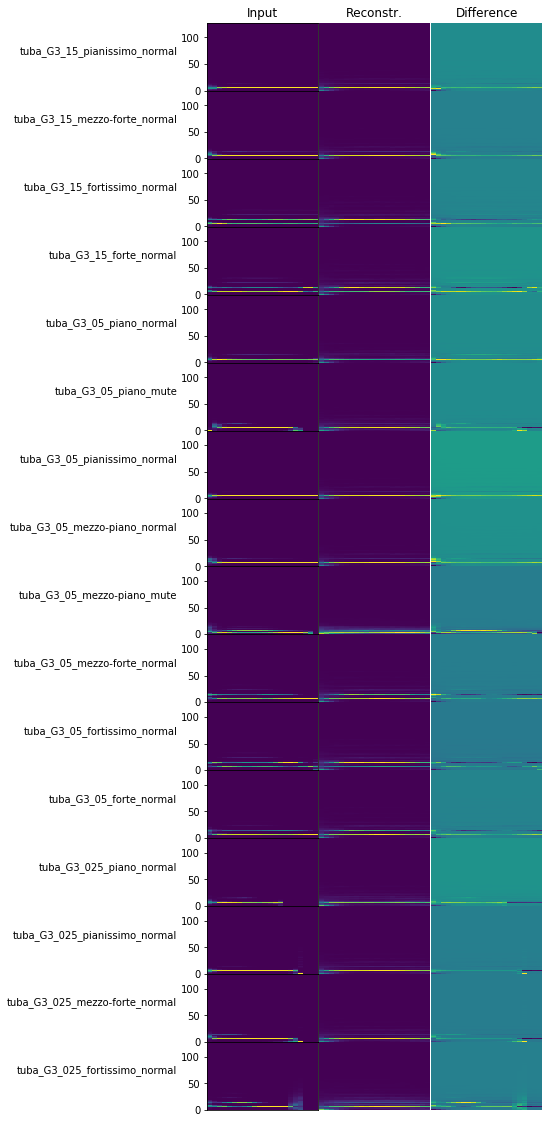

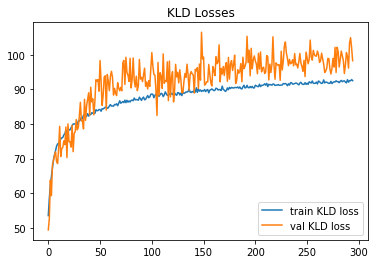

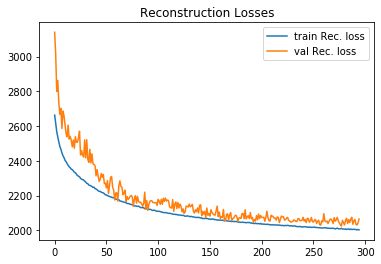

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 301


100%|██████████| 727/727 [00:10<00:00, 72.41it/s]

training_avg_loss=2461.72
 training_avg_kld=91.72
 training_avg_rec=2003.12




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2549.87

Epoch: 302


100%|██████████| 727/727 [00:10<00:00, 70.69it/s]

training_avg_loss=2465.00
 training_avg_kld=92.54
 training_avg_rec=2002.29




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2547.27

Epoch: 303


100%|██████████| 727/727 [00:10<00:00, 70.87it/s]

training_avg_loss=2467.16
 training_avg_kld=92.67
 training_avg_rec=2003.84




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2555.43

Epoch: 304


100%|██████████| 727/727 [00:10<00:00, 71.34it/s]

training_avg_loss=2463.19
 training_avg_kld=92.55
 training_avg_rec=2000.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.64

Epoch: 305


100%|██████████| 727/727 [00:10<00:00, 71.08it/s]

training_avg_loss=2465.47
 training_avg_kld=92.62
 training_avg_rec=2002.37




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2543.98

Epoch: 306


100%|██████████| 727/727 [00:10<00:00, 71.36it/s]

training_avg_loss=2462.26
 training_avg_kld=91.76
 training_avg_rec=2003.48




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2525.37

Epoch: 307


100%|██████████| 727/727 [00:10<00:00, 71.61it/s]

training_avg_loss=2461.27
 training_avg_kld=91.71
 training_avg_rec=2002.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2560.13

Epoch: 308


100%|██████████| 727/727 [00:10<00:00, 71.57it/s]

training_avg_loss=2463.20
 training_avg_kld=92.49
 training_avg_rec=2000.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2538.15

Epoch: 309


100%|██████████| 727/727 [00:10<00:00, 71.52it/s]

training_avg_loss=2464.80
 training_avg_kld=92.67
 training_avg_rec=2001.43




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2562.87

Epoch: 310


100%|██████████| 727/727 [00:10<00:00, 71.15it/s]

training_avg_loss=2462.04
 training_avg_kld=92.21
 training_avg_rec=2000.98



val_avg_loss=2546.91



Exception ignored in: <function _DataLoaderIter.__del__ at 0x7fc68c8a3d90>
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/queues.py", line 354, in get
    return _ForkingPickler.loads(res)
  File "/home/carloshernan/anaconda3/lib/python3.7/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/resource_sharer.py", line 87, in get_connection
    c 

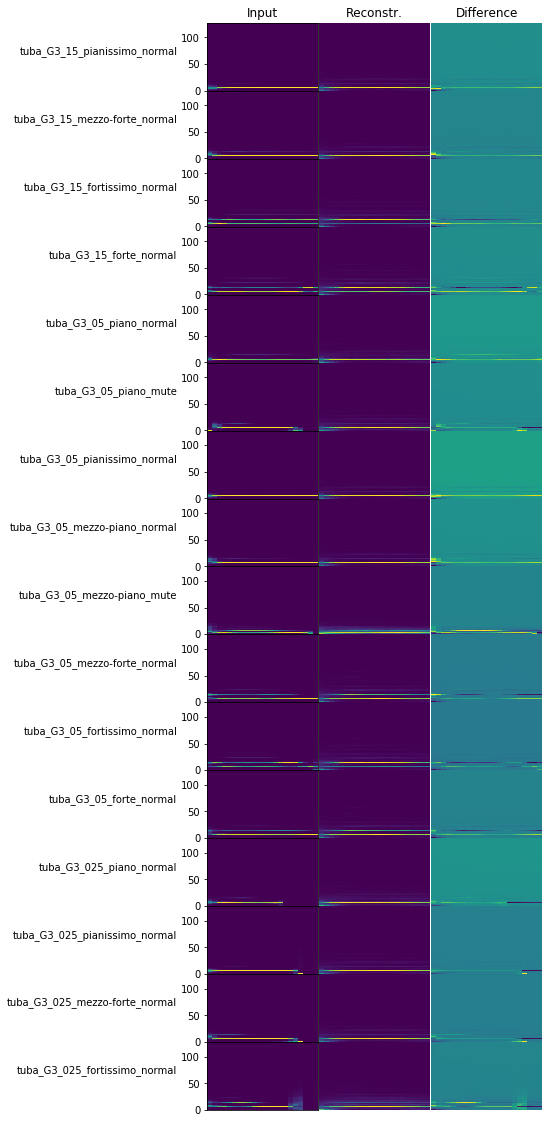

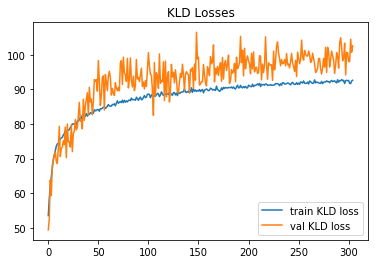

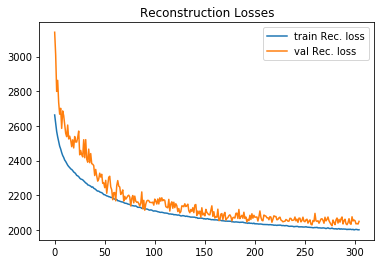

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 311


100%|██████████| 727/727 [00:10<00:00, 72.33it/s]

training_avg_loss=2464.45
 training_avg_kld=92.41
 training_avg_rec=2002.42




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2546.04

Epoch: 312


100%|██████████| 727/727 [00:10<00:00, 71.50it/s]

training_avg_loss=2464.90
 training_avg_kld=92.74
 training_avg_rec=2001.22




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2539.25

Epoch: 313


100%|██████████| 727/727 [00:10<00:00, 70.99it/s]

training_avg_loss=2461.48
 training_avg_kld=92.13
 training_avg_rec=2000.85




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2540.58

Epoch: 314


100%|██████████| 727/727 [00:10<00:00, 70.95it/s]

training_avg_loss=2460.20
 training_avg_kld=91.99
 training_avg_rec=2000.24




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2535.12

Epoch: 315


100%|██████████| 727/727 [00:10<00:00, 71.74it/s]

training_avg_loss=2462.86
 training_avg_kld=92.56
 training_avg_rec=2000.07




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2537.48

Epoch: 316


100%|██████████| 727/727 [00:10<00:00, 71.37it/s]

training_avg_loss=2463.08
 training_avg_kld=92.53
 training_avg_rec=2000.45




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2568.40

Epoch: 317


100%|██████████| 727/727 [00:10<00:00, 71.52it/s]

training_avg_loss=2460.65
 training_avg_kld=92.38
 training_avg_rec=1998.74




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2536.67

Epoch: 318


100%|██████████| 727/727 [00:10<00:00, 71.72it/s]

training_avg_loss=2462.30
 training_avg_kld=92.45
 training_avg_rec=2000.06




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2556.97

Epoch: 319


100%|██████████| 727/727 [00:10<00:00, 71.39it/s]

training_avg_loss=2462.81
 training_avg_kld=92.52
 training_avg_rec=2000.23




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2551.49

Epoch: 320


100%|██████████| 727/727 [00:10<00:00, 71.06it/s]

training_avg_loss=2458.51
 training_avg_kld=92.32
 training_avg_rec=1996.91



val_avg_loss=2525.64



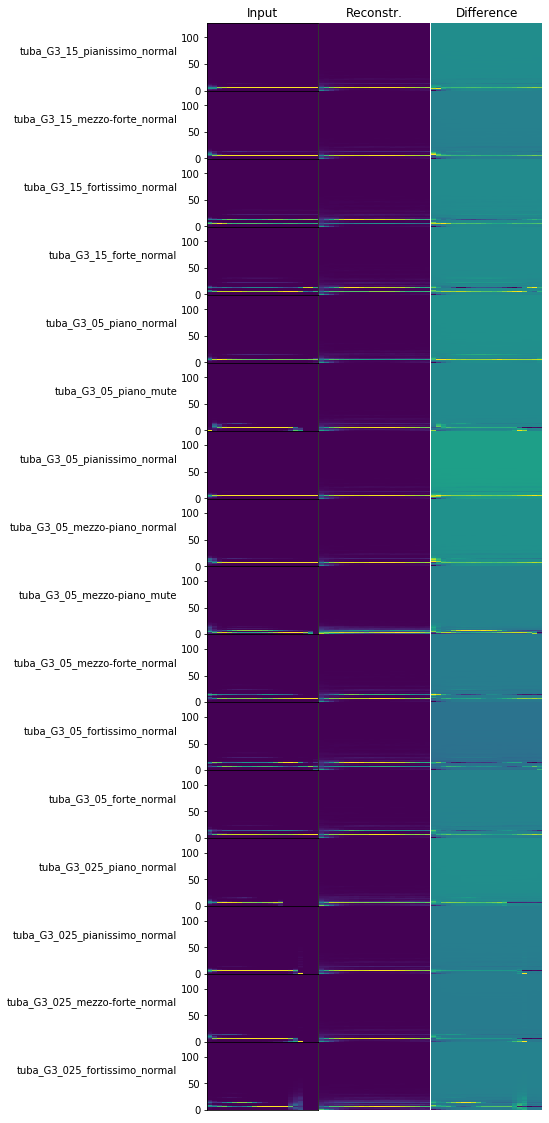

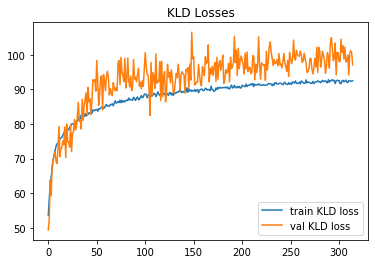

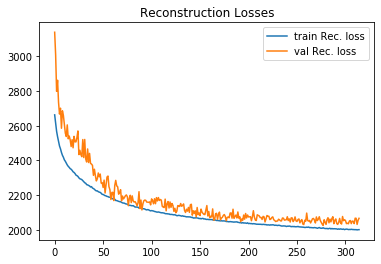

  0%|          | 0/727 [00:00<?, ?it/s]

Epoch: 321


100%|██████████| 727/727 [00:10<00:00, 72.31it/s]

training_avg_loss=2459.10
 training_avg_kld=92.47
 training_avg_rec=1996.73




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2534.91

Epoch: 322


100%|██████████| 727/727 [00:10<00:00, 71.02it/s]

training_avg_loss=2458.32
 training_avg_kld=91.93
 training_avg_rec=1998.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2559.54

Epoch: 323


100%|██████████| 727/727 [00:10<00:00, 71.24it/s]

training_avg_loss=2458.11
 training_avg_kld=92.13
 training_avg_rec=1997.44




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2528.13

Epoch: 324


100%|██████████| 727/727 [00:10<00:00, 71.26it/s]

training_avg_loss=2461.41
 training_avg_kld=92.55
 training_avg_rec=1998.68




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2542.95

Epoch: 325


100%|██████████| 727/727 [00:10<00:00, 71.29it/s]

training_avg_loss=2457.88
 training_avg_kld=92.34
 training_avg_rec=1996.21




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2524.43

Epoch: 326


100%|██████████| 727/727 [00:10<00:00, 71.16it/s]

training_avg_loss=2460.28
 training_avg_kld=92.75
 training_avg_rec=1996.51




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2549.89

Epoch: 327


100%|██████████| 727/727 [00:10<00:00, 71.05it/s]

training_avg_loss=2459.64
 training_avg_kld=92.99
 training_avg_rec=1994.70




  0%|          | 0/727 [00:00<?, ?it/s]

val_avg_loss=2533.43

Epoch: 328


 73%|███████▎  | 529/727 [00:07<00:02, 75.63it/s]Process Process-6894:
Process Process-6895:
Process Process-6900:
Process Process-6891:
Process Process-6892:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-6896:
Process Process-6893:
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-6897:
Process Process-6898:
Traceback (most recent call last):
Process Process-6899:
Traceback (most recent call last):
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*s

  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 920, in wait
    ready = selector.select(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
KeyboardInterrupt
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 920, in wait
    ready = selector.select(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/carloshernan/anaconda3/lib/python3.7/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
  File "/home/carloshernan/anaconda3/lib

KeyboardInterrupt: 

In [9]:
training.train_model(input='mel_cut', model_name='TimeConv2D_cut', loss_f='bce')

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>
    
</div>

<div>
    
<button type="button" class="btn btn-primary" style="float:left; background-color:#a273f9; border:0"><a href="#top" style="color:white; text-decoration: none">⇦ Back to Top</a></button>

<button type="button" class="btn btn-primary" style="float:right; background-color:#BA55D3; border:0"><a href="2-chord_prediction.ipynb" style="color:white; text-decoration: none">Go to Chord Detection ⇒</a></button>
    
</div>